<a href="https://colab.research.google.com/github/mudnighrs/Fraud_Detection/blob/main/Fraud_DetectionPART2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
df=pd.read_csv("/Users/lakshayasinghtanwar/Desktop/ESElab/credit_card.csv")
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


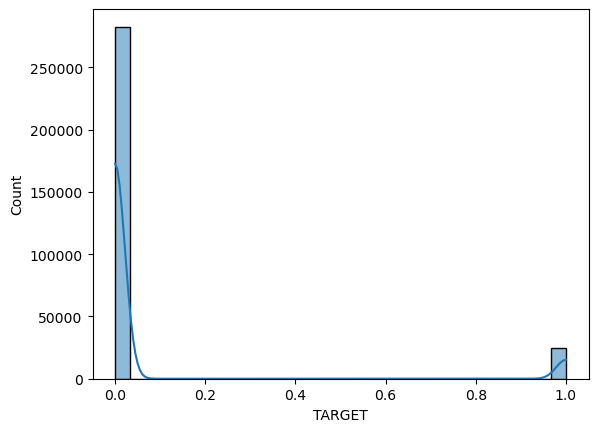

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(df['TARGET'], bins=30, kde=True)
plt.show()



In [ ]:
print(df['TARGET'].describe())


count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64


In [ ]:
#TARGET = 1 fraud - yes
df['TARGET'].value_counts()


TARGET
0    282686
1     24825
Name: count, dtype: int64

In [ ]:
missing_values = df.isna().sum().to_dict()
missing_values

{'SK_ID_CURR': 0,
 'TARGET': 0,
 'NAME_CONTRACT_TYPE': 0,
 'CODE_GENDER': 0,
 'FLAG_OWN_CAR': 0,
 'FLAG_OWN_REALTY': 0,
 'CNT_CHILDREN': 0,
 'AMT_INCOME_TOTAL': 0,
 'AMT_CREDIT': 0,
 'AMT_ANNUITY': 12,
 'AMT_GOODS_PRICE': 278,
 'NAME_TYPE_SUITE': 1292,
 'NAME_INCOME_TYPE': 0,
 'NAME_EDUCATION_TYPE': 0,
 'NAME_FAMILY_STATUS': 0,
 'NAME_HOUSING_TYPE': 0,
 'REGION_POPULATION_RELATIVE': 0,
 'DAYS_BIRTH': 0,
 'DAYS_EMPLOYED': 0,
 'DAYS_REGISTRATION': 0,
 'DAYS_ID_PUBLISH': 0,
 'OWN_CAR_AGE': 202929,
 'FLAG_MOBIL': 0,
 'FLAG_EMP_PHONE': 0,
 'FLAG_WORK_PHONE': 0,
 'FLAG_CONT_MOBILE': 0,
 'FLAG_PHONE': 0,
 'FLAG_EMAIL': 0,
 'OCCUPATION_TYPE': 96391,
 'CNT_FAM_MEMBERS': 2,
 'REGION_RATING_CLIENT': 0,
 'REGION_RATING_CLIENT_W_CITY': 0,
 'WEEKDAY_APPR_PROCESS_START': 0,
 'HOUR_APPR_PROCESS_START': 0,
 'REG_REGION_NOT_LIVE_REGION': 0,
 'REG_REGION_NOT_WORK_REGION': 0,
 'LIVE_REGION_NOT_WORK_REGION': 0,
 'REG_CITY_NOT_LIVE_CITY': 0,
 'REG_CITY_NOT_WORK_CITY': 0,
 'LIVE_CITY_NOT_WORK_CITY': 0,
 'ORG

In [ ]:
for label, content in df.items():
  if content.dtype=="object":
   print(label)

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE
FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE


In [ ]:
df_tmp = df.copy()
df_tmp

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for label, content in df_tmp.items():
  if content.dtype=="object":
   print(label)

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE
FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE


In [ ]:
for label, content in df_tmp.items():
    if content.dtype=="object":
      df_tmp[label] = content.astype("category").cat.as_ordered()

In [ ]:
df_tmp.head().T

,0,1,2,3,4
SK_ID_CURR,100002,100003,100004,100006,100007
TARGET,1,0,0,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans
CODE_GENDER,M,F,M,F,M
FLAG_OWN_CAR,N,N,Y,N,N
...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.0,0.0,0.0,NaN,0.0
AMT_REQ_CREDIT_BUREAU_WEEK,0.0,0.0,0.0,NaN,0.0
AMT_REQ_CREDIT_BUREAU_MON,0.0,0.0,0.0,NaN,0.0
AMT_REQ_CREDIT_BUREAU_QRT,0.0,0.0,0.0,NaN,0.0


In [ ]:
df_tmp.NAME_FAMILY_STATUS.cat.categories

family_status=df_tmp.NAME_FAMILY_STATUS.cat.categories

In [ ]:
df_tmp.NAME_FAMILY_STATUS.cat.codes

0         3
1         1
2         3
3         0
4         3
         ..
307506    2
307507    5
307508    2
307509    1
307510    1
Length: 307511, dtype: int8

In [ ]:
((df_tmp.isnull().sum()/len(df_tmp))*100).to_dict()

{'SK_ID_CURR': 0.0,
 'TARGET': 0.0,
 'NAME_CONTRACT_TYPE': 0.0,
 'CODE_GENDER': 0.0,
 'FLAG_OWN_CAR': 0.0,
 'FLAG_OWN_REALTY': 0.0,
 'CNT_CHILDREN': 0.0,
 'AMT_INCOME_TOTAL': 0.0,
 'AMT_CREDIT': 0.0,
 'AMT_ANNUITY': 0.003902299429939092,
 'AMT_GOODS_PRICE': 0.09040327012692229,
 'NAME_TYPE_SUITE': 0.42014757195677555,
 'NAME_INCOME_TYPE': 0.0,
 'NAME_EDUCATION_TYPE': 0.0,
 'NAME_FAMILY_STATUS': 0.0,
 'NAME_HOUSING_TYPE': 0.0,
 'REGION_POPULATION_RELATIVE': 0.0,
 'DAYS_BIRTH': 0.0,
 'DAYS_EMPLOYED': 0.0,
 'DAYS_REGISTRATION': 0.0,
 'DAYS_ID_PUBLISH': 0.0,
 'OWN_CAR_AGE': 65.9908100848425,
 'FLAG_MOBIL': 0.0,
 'FLAG_EMP_PHONE': 0.0,
 'FLAG_WORK_PHONE': 0.0,
 'FLAG_CONT_MOBILE': 0.0,
 'FLAG_PHONE': 0.0,
 'FLAG_EMAIL': 0.0,
 'OCCUPATION_TYPE': 31.345545362604916,
 'CNT_FAM_MEMBERS': 0.0006503832383231819,
 'REGION_RATING_CLIENT': 0.0,
 'REGION_RATING_CLIENT_W_CITY': 0.0,
 'WEEKDAY_APPR_PROCESS_START': 0.0,
 'HOUR_APPR_PROCESS_START': 0.0,
 'REG_REGION_NOT_LIVE_REGION': 0.0,
 'REG_REGION_NO

In [ ]:
#Filling numerical values first
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

AMT_ANNUITY
AMT_GOODS_PRICE
OWN_CAR_AGE
CNT_FAM_MEMBERS
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMAX_MODE
FLOORSMIN_MODE
LANDAREA_MODE
LIVINGAPARTMENTS_MODE
LIVINGAREA_MODE
NONLIVINGAPARTMENTS_MODE
NONLIVINGAREA_MODE
APARTMENTS_MEDI
BASEMENTAREA_MEDI
YEARS_BEGINEXPLUATATION_MEDI
YEARS_BUILD_MEDI
COMMONAREA_MEDI
ELEVATORS_MEDI
ENTRANCES_MEDI
FLOORSMAX_MEDI
FLOORSMIN_MEDI
LANDAREA_MEDI
LIVINGAPARTMENTS_MEDI
LIVINGAREA_MEDI
NONLIVINGAPARTMENTS_MEDI
NONLIVINGAREA_MEDI
TOTALAREA_MODE
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
AMT_REQ_CREDIT_BUREAU_HOU

In [ ]:
import pandas as pd
missing_cols = {}

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            missing_cols[label + "_is_missing"] = pd.isnull(content)
            df_tmp[label] = content.fillna(content.median())

# Add new columns in one operation
df_tmp = pd.concat([df_tmp, pd.DataFrame(missing_cols)], axis=1)

In [ ]:
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

In [ ]:
for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
   print(label)

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE
FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE


In [ ]:
for label, content in df_tmp.items():

 if not pd.api.types.is_numeric_dtype(content):
# Add binary column to inidicate whether sample had missing value
  df_tmp[label+"_is_missing"] = pd.isnull(content)
# We add the +1 because pandas encodes missing categories as -1
  df_tmp[label] = pd.Categorical(content).codes+1

In [ ]:
df_tmp.isna().sum().to_dict()

{'SK_ID_CURR': 0,
 'TARGET': 0,
 'NAME_CONTRACT_TYPE': 0,
 'CODE_GENDER': 0,
 'FLAG_OWN_CAR': 0,
 'FLAG_OWN_REALTY': 0,
 'CNT_CHILDREN': 0,
 'AMT_INCOME_TOTAL': 0,
 'AMT_CREDIT': 0,
 'AMT_ANNUITY': 0,
 'AMT_GOODS_PRICE': 0,
 'NAME_TYPE_SUITE': 0,
 'NAME_INCOME_TYPE': 0,
 'NAME_EDUCATION_TYPE': 0,
 'NAME_FAMILY_STATUS': 0,
 'NAME_HOUSING_TYPE': 0,
 'REGION_POPULATION_RELATIVE': 0,
 'DAYS_BIRTH': 0,
 'DAYS_EMPLOYED': 0,
 'DAYS_REGISTRATION': 0,
 'DAYS_ID_PUBLISH': 0,
 'OWN_CAR_AGE': 0,
 'FLAG_MOBIL': 0,
 'FLAG_EMP_PHONE': 0,
 'FLAG_WORK_PHONE': 0,
 'FLAG_CONT_MOBILE': 0,
 'FLAG_PHONE': 0,
 'FLAG_EMAIL': 0,
 'OCCUPATION_TYPE': 0,
 'CNT_FAM_MEMBERS': 0,
 'REGION_RATING_CLIENT': 0,
 'REGION_RATING_CLIENT_W_CITY': 0,
 'WEEKDAY_APPR_PROCESS_START': 0,
 'HOUR_APPR_PROCESS_START': 0,
 'REG_REGION_NOT_LIVE_REGION': 0,
 'REG_REGION_NOT_WORK_REGION': 0,
 'LIVE_REGION_NOT_WORK_REGION': 0,
 'REG_CITY_NOT_LIVE_CITY': 0,
 'REG_CITY_NOT_WORK_CITY': 0,
 'LIVE_CITY_NOT_WORK_CITY': 0,
 'ORGANIZATION_TYPE'

In [ ]:
 df_tmp.dtypes.to_dict()


{'SK_ID_CURR': dtype('int64'),
 'TARGET': dtype('int64'),
 'NAME_CONTRACT_TYPE': dtype('int8'),
 'CODE_GENDER': dtype('int8'),
 'FLAG_OWN_CAR': dtype('int8'),
 'FLAG_OWN_REALTY': dtype('int8'),
 'CNT_CHILDREN': dtype('int64'),
 'AMT_INCOME_TOTAL': dtype('float64'),
 'AMT_CREDIT': dtype('float64'),
 'AMT_ANNUITY': dtype('float64'),
 'AMT_GOODS_PRICE': dtype('float64'),
 'NAME_TYPE_SUITE': dtype('int8'),
 'NAME_INCOME_TYPE': dtype('int8'),
 'NAME_EDUCATION_TYPE': dtype('int8'),
 'NAME_FAMILY_STATUS': dtype('int8'),
 'NAME_HOUSING_TYPE': dtype('int8'),
 'REGION_POPULATION_RELATIVE': dtype('float64'),
 'DAYS_BIRTH': dtype('int64'),
 'DAYS_EMPLOYED': dtype('int64'),
 'DAYS_REGISTRATION': dtype('float64'),
 'DAYS_ID_PUBLISH': dtype('int64'),
 'OWN_CAR_AGE': dtype('float64'),
 'FLAG_MOBIL': dtype('int64'),
 'FLAG_EMP_PHONE': dtype('int64'),
 'FLAG_WORK_PHONE': dtype('int64'),
 'FLAG_CONT_MOBILE': dtype('int64'),
 'FLAG_PHONE': dtype('int64'),
 'FLAG_EMAIL': dtype('int64'),
 'OCCUPATION_TYPE':

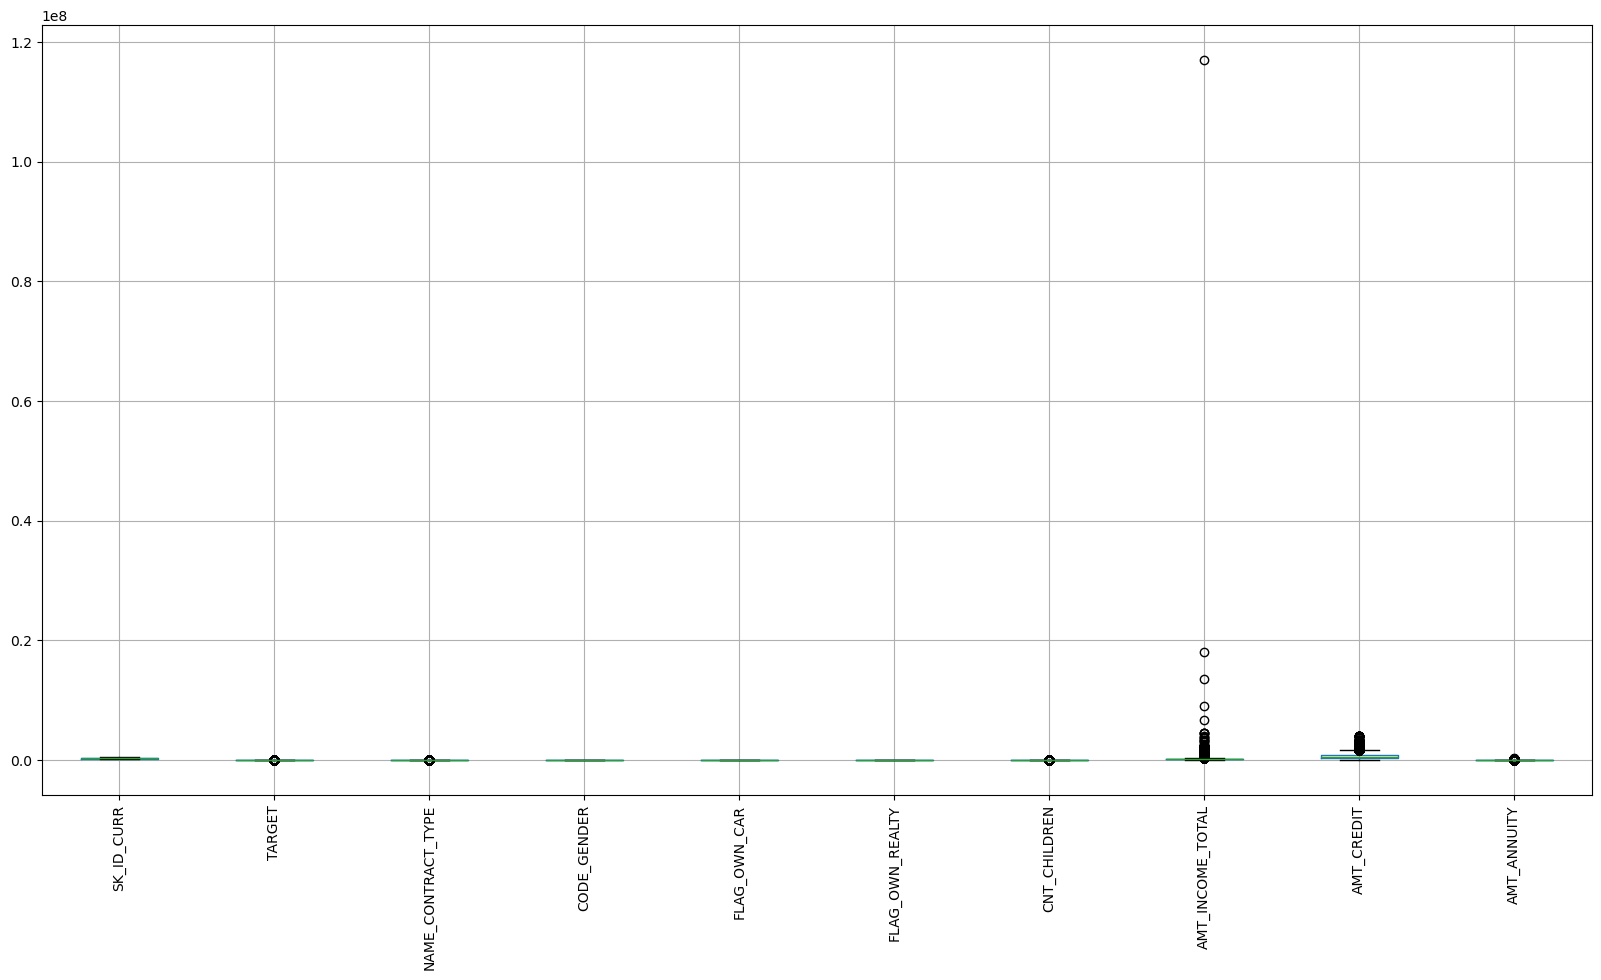

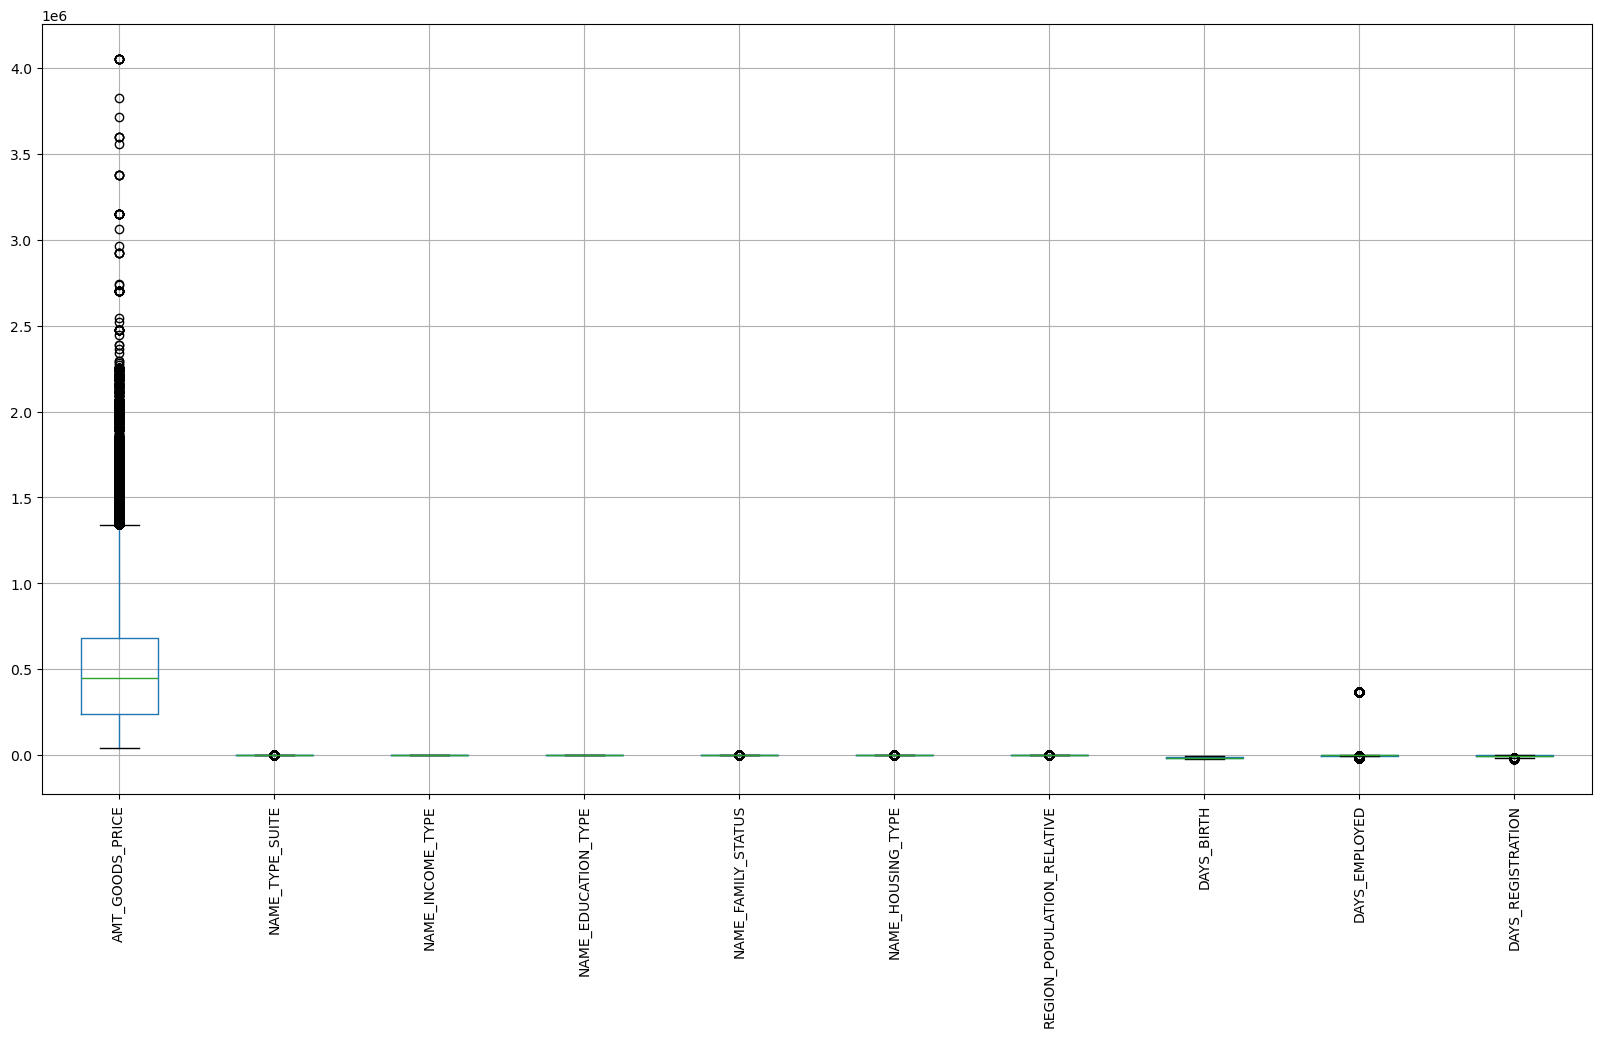

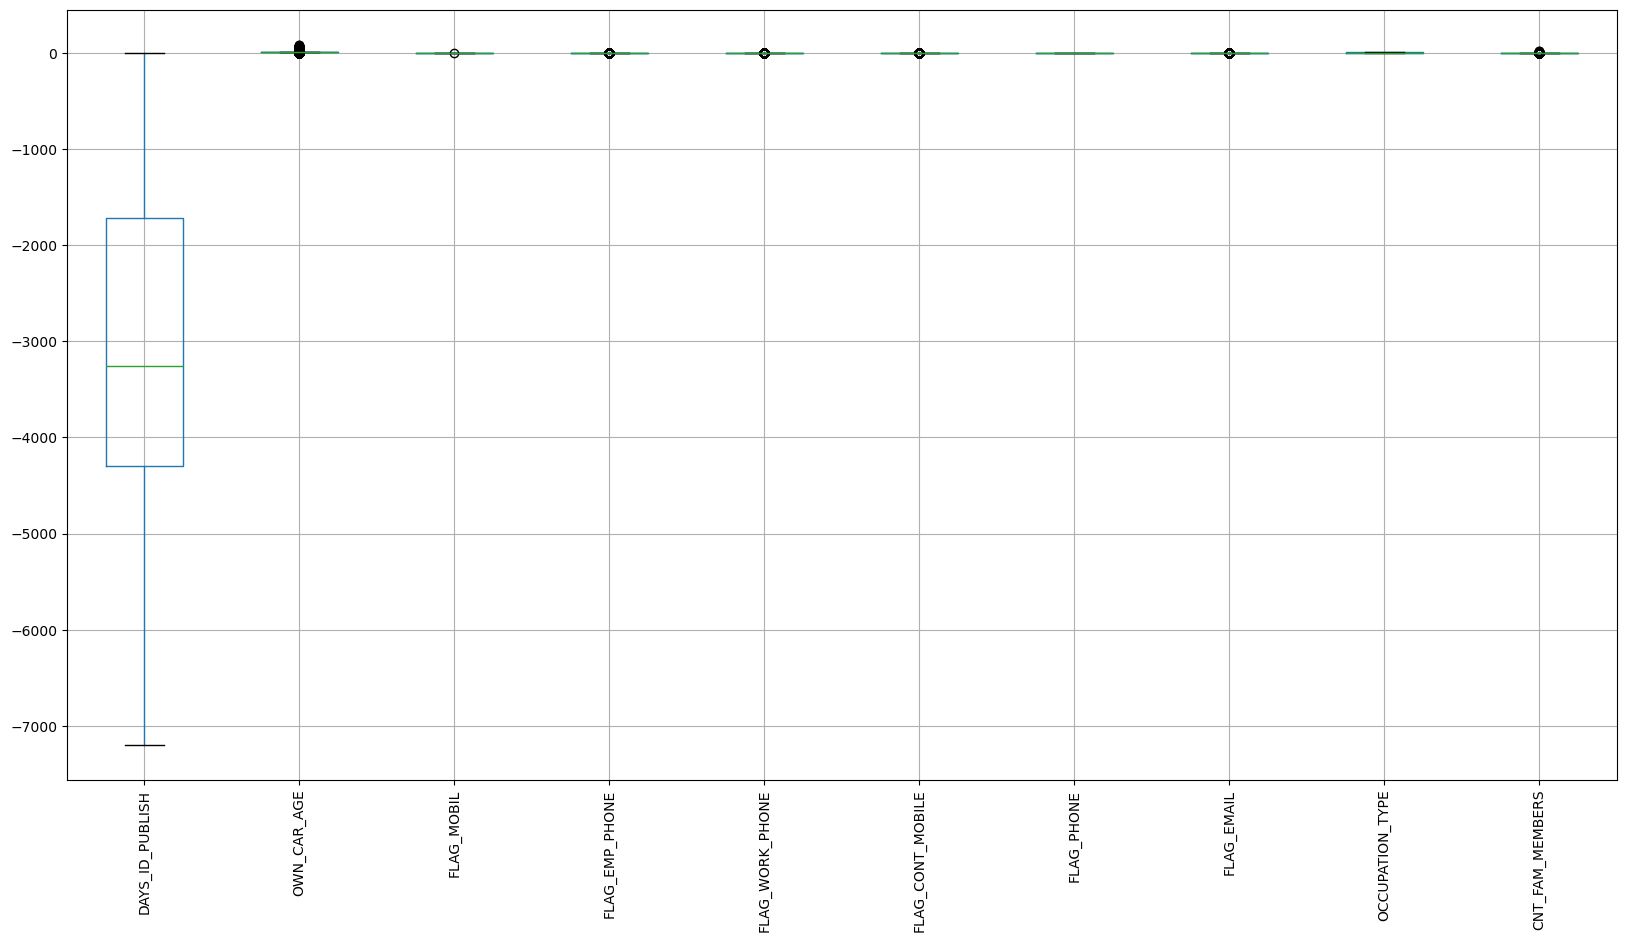

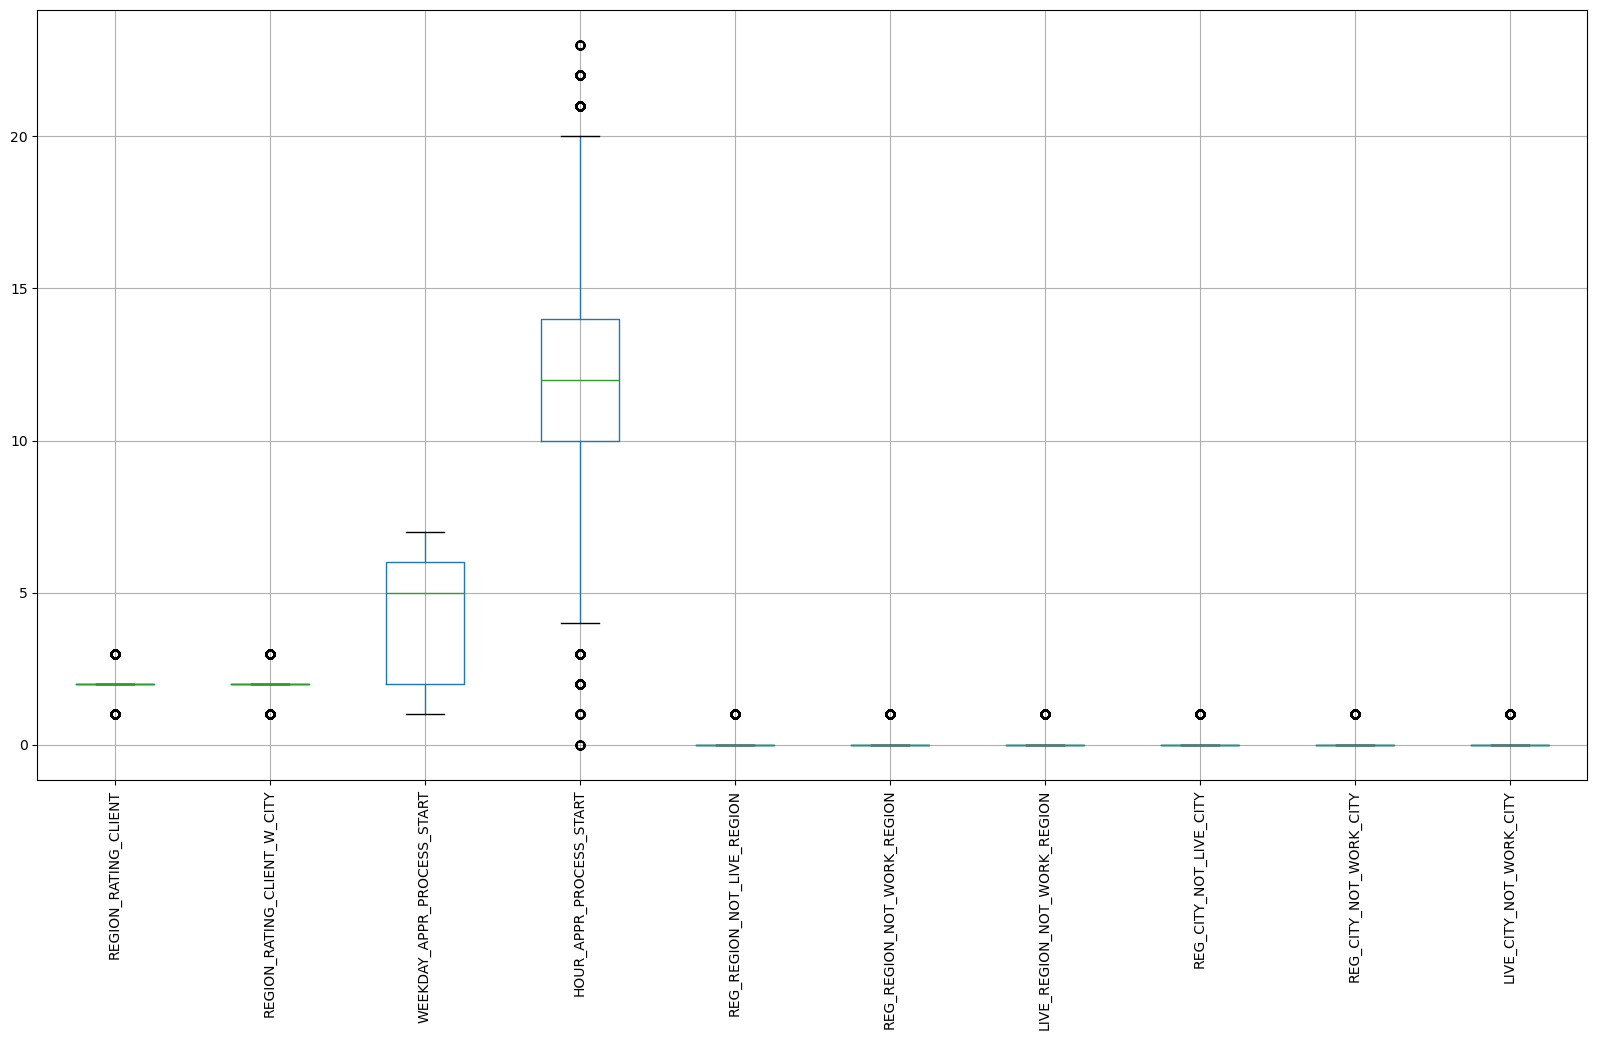

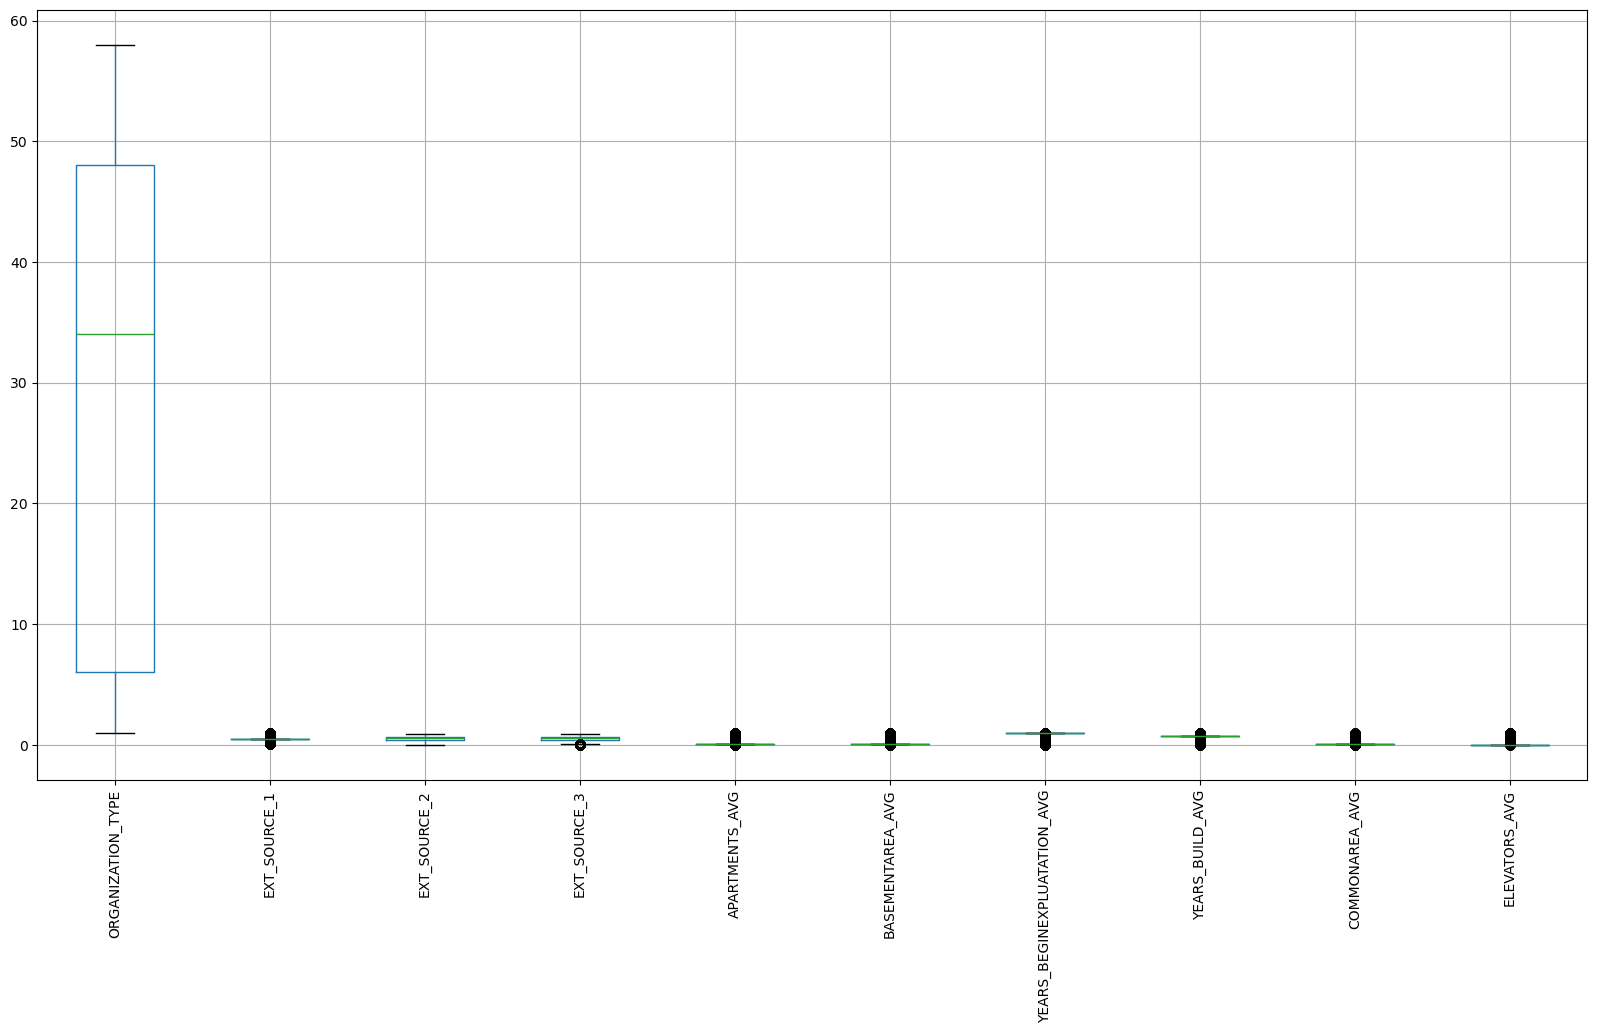

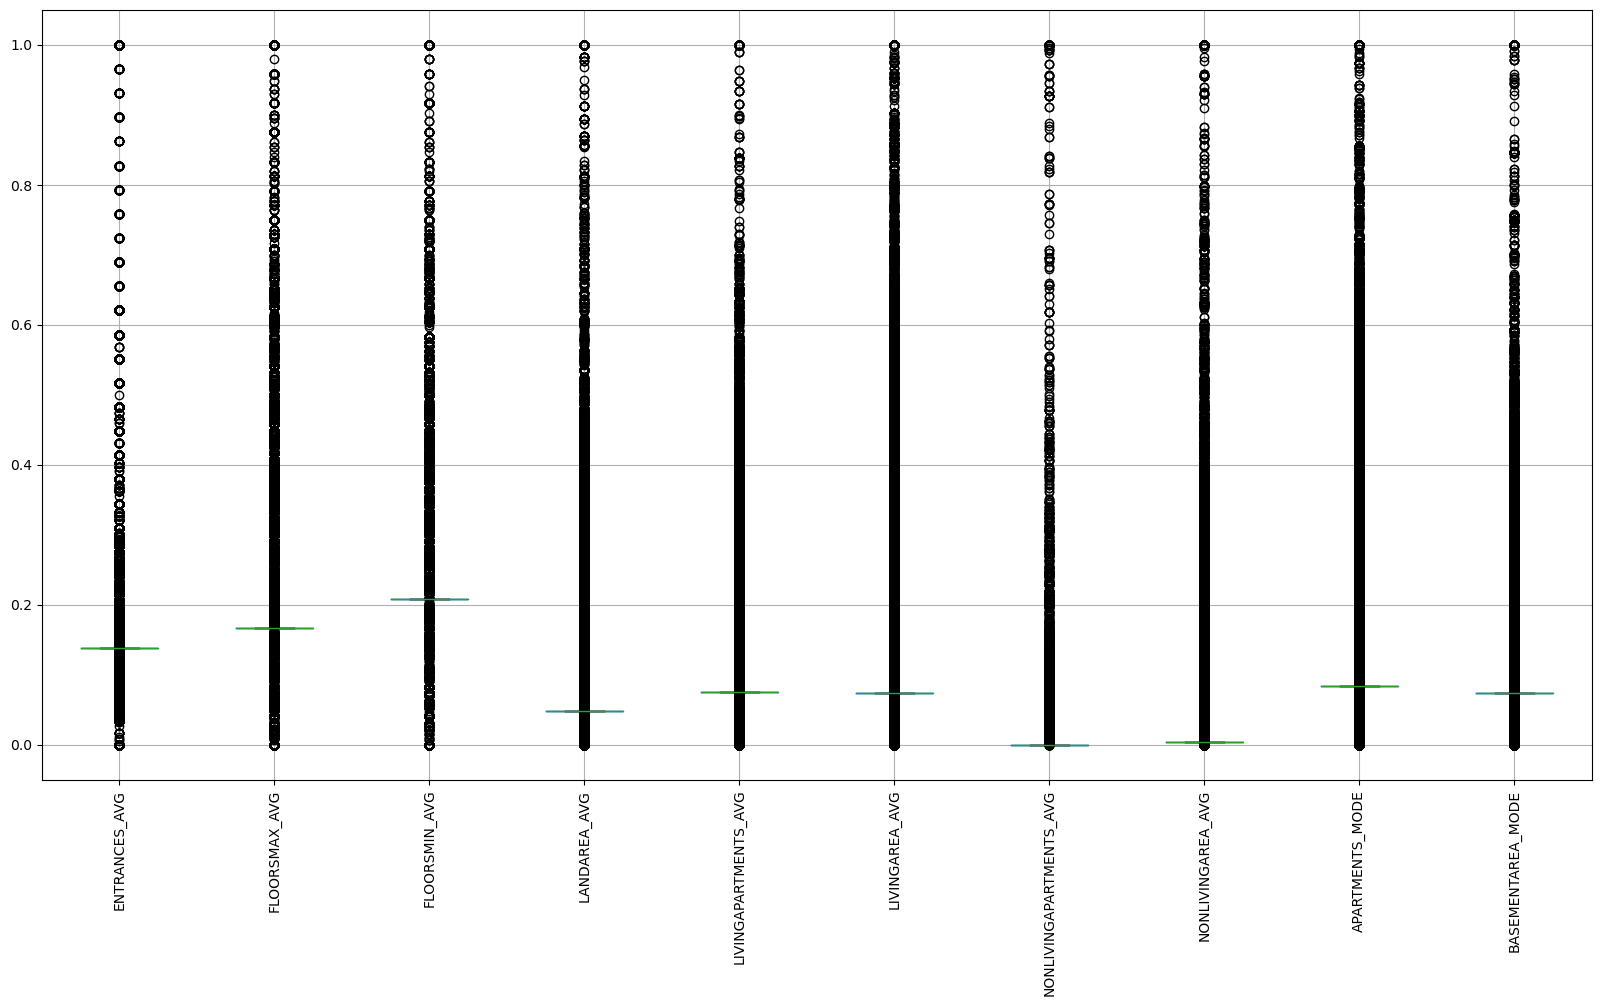

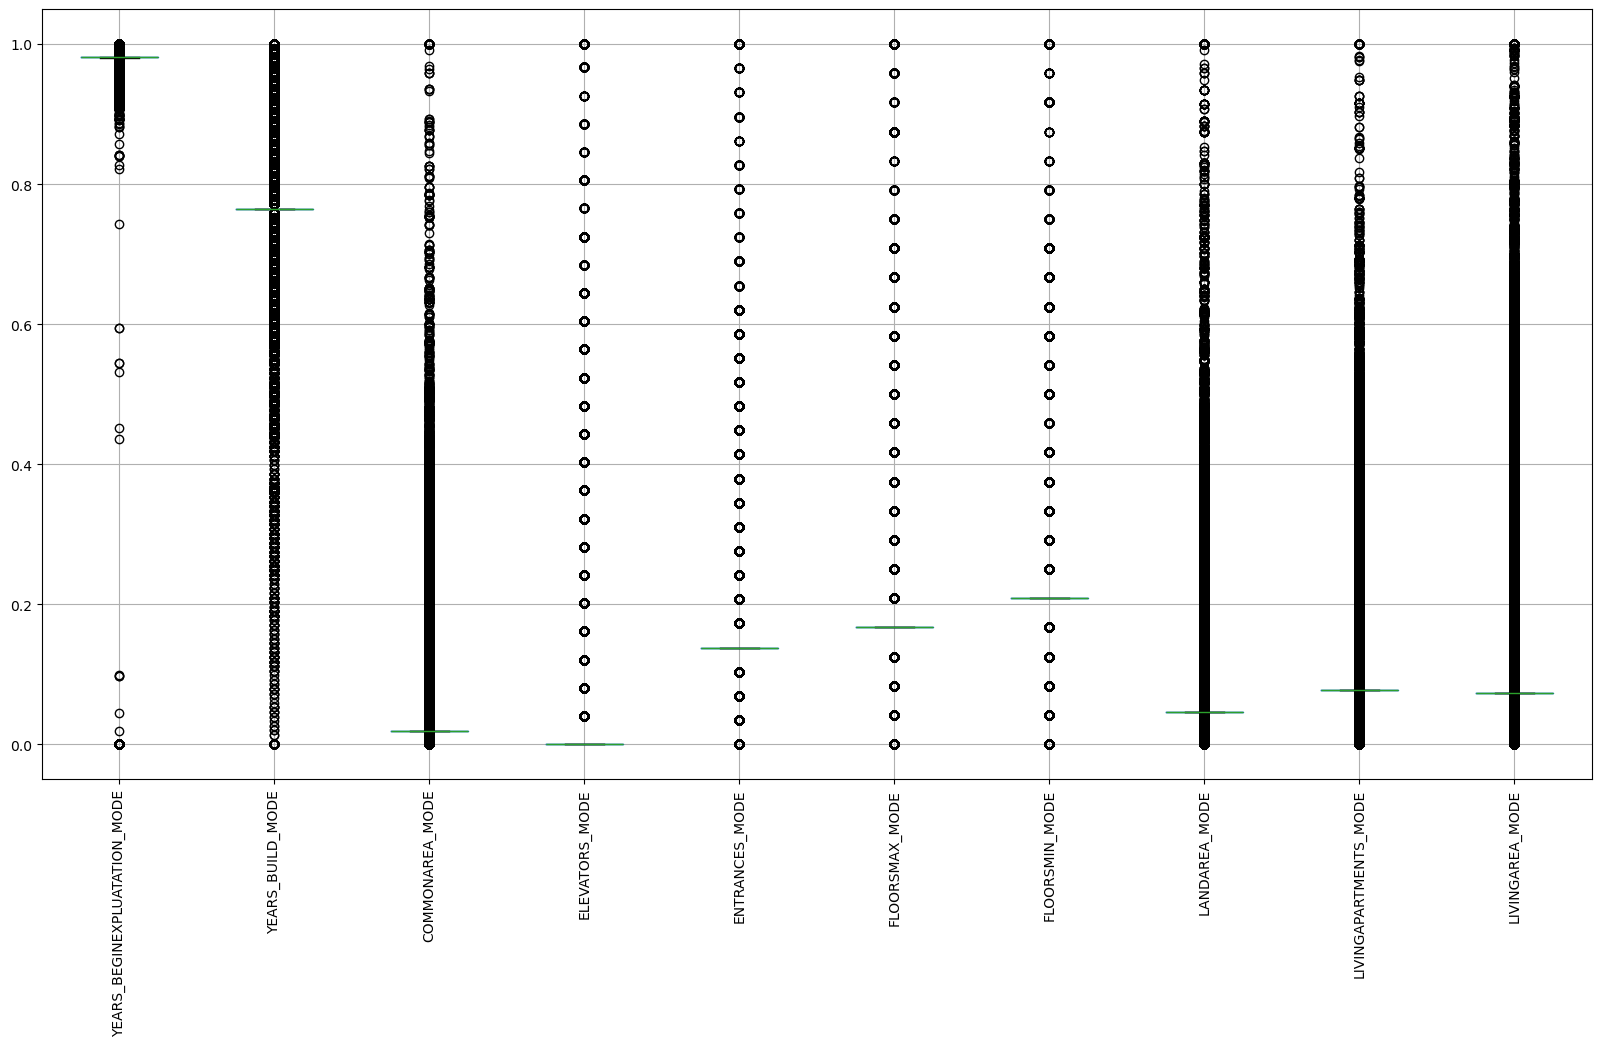

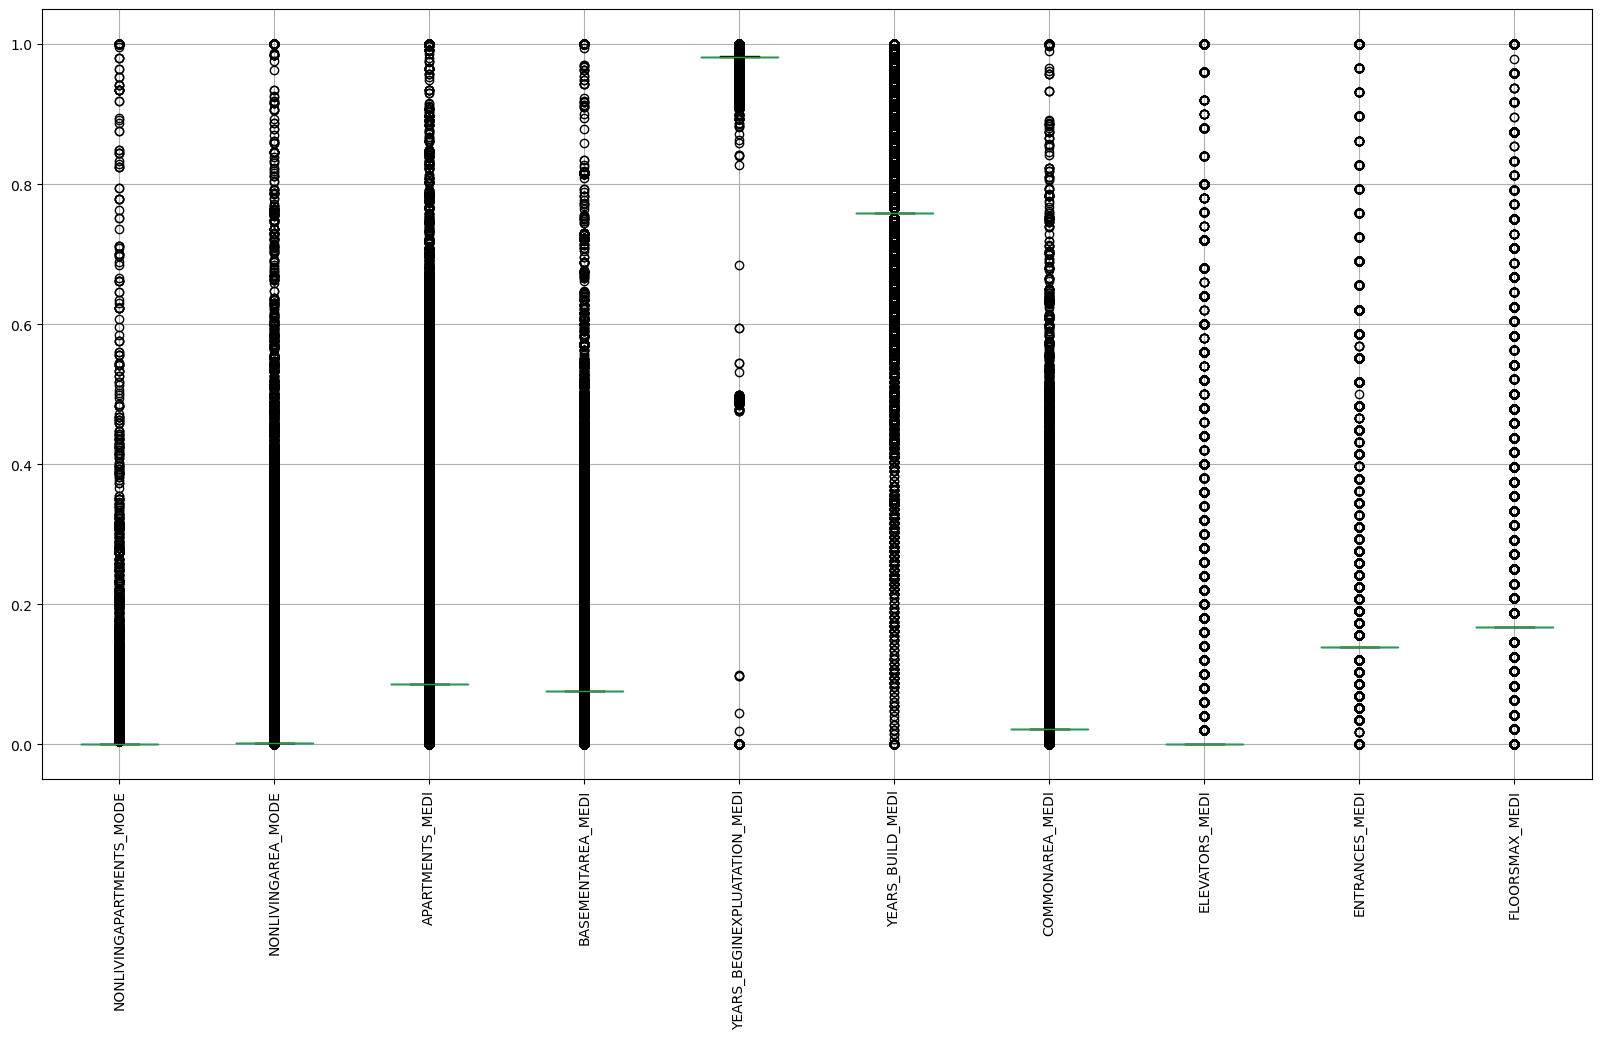

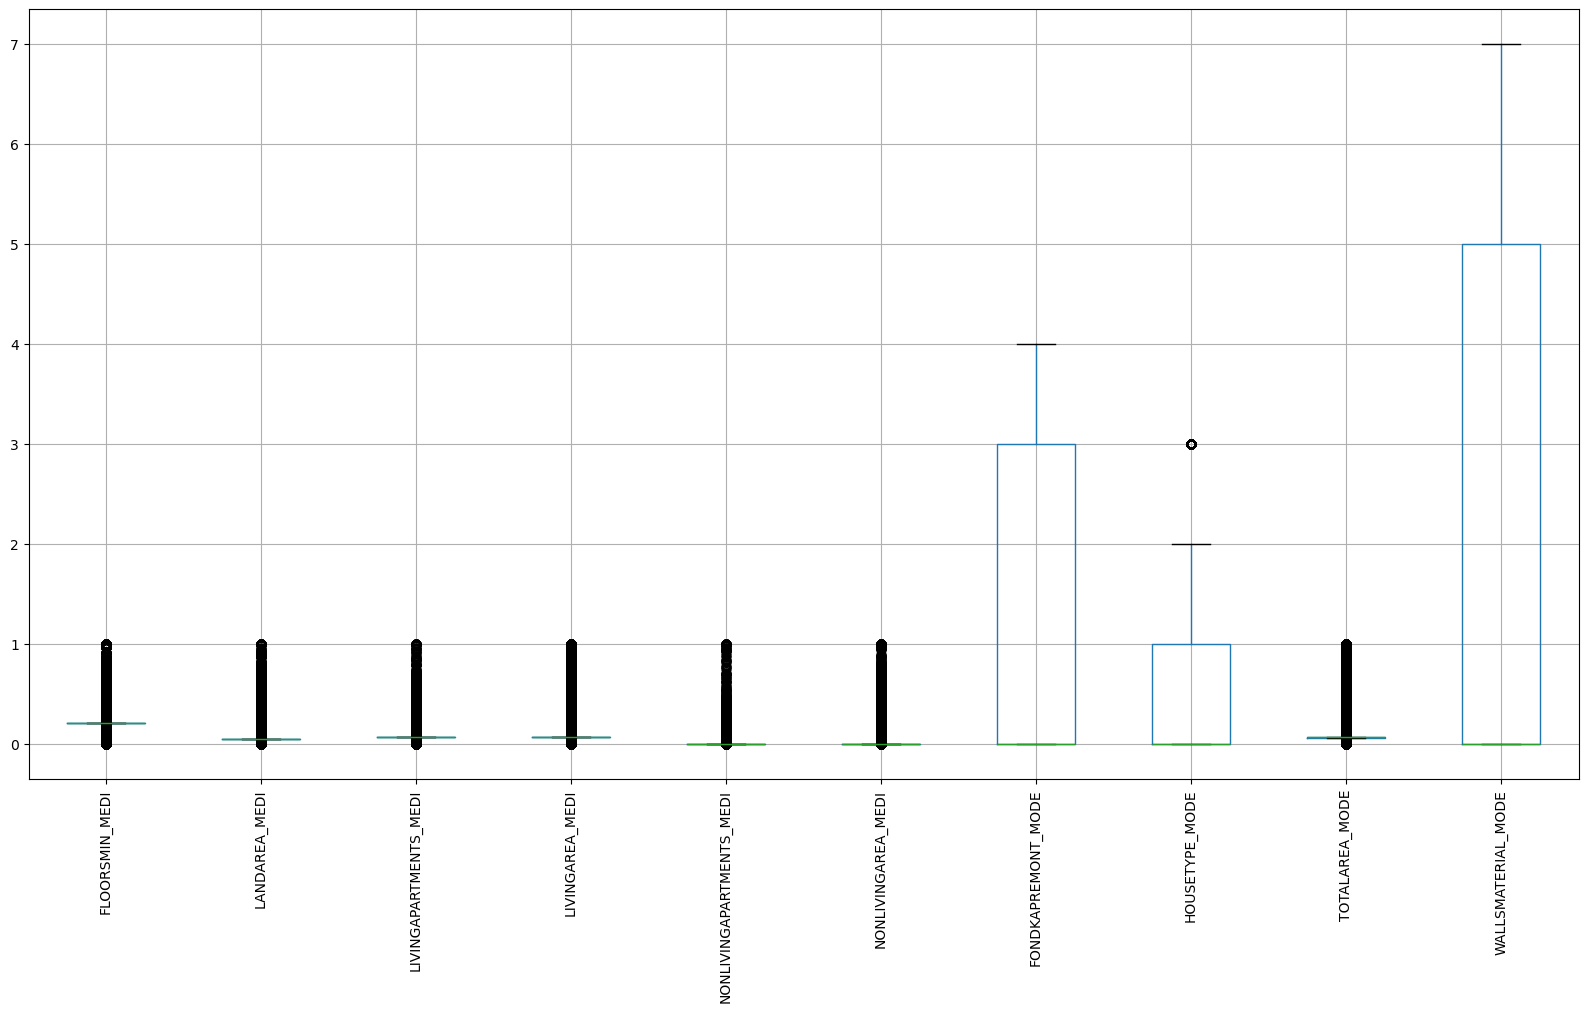

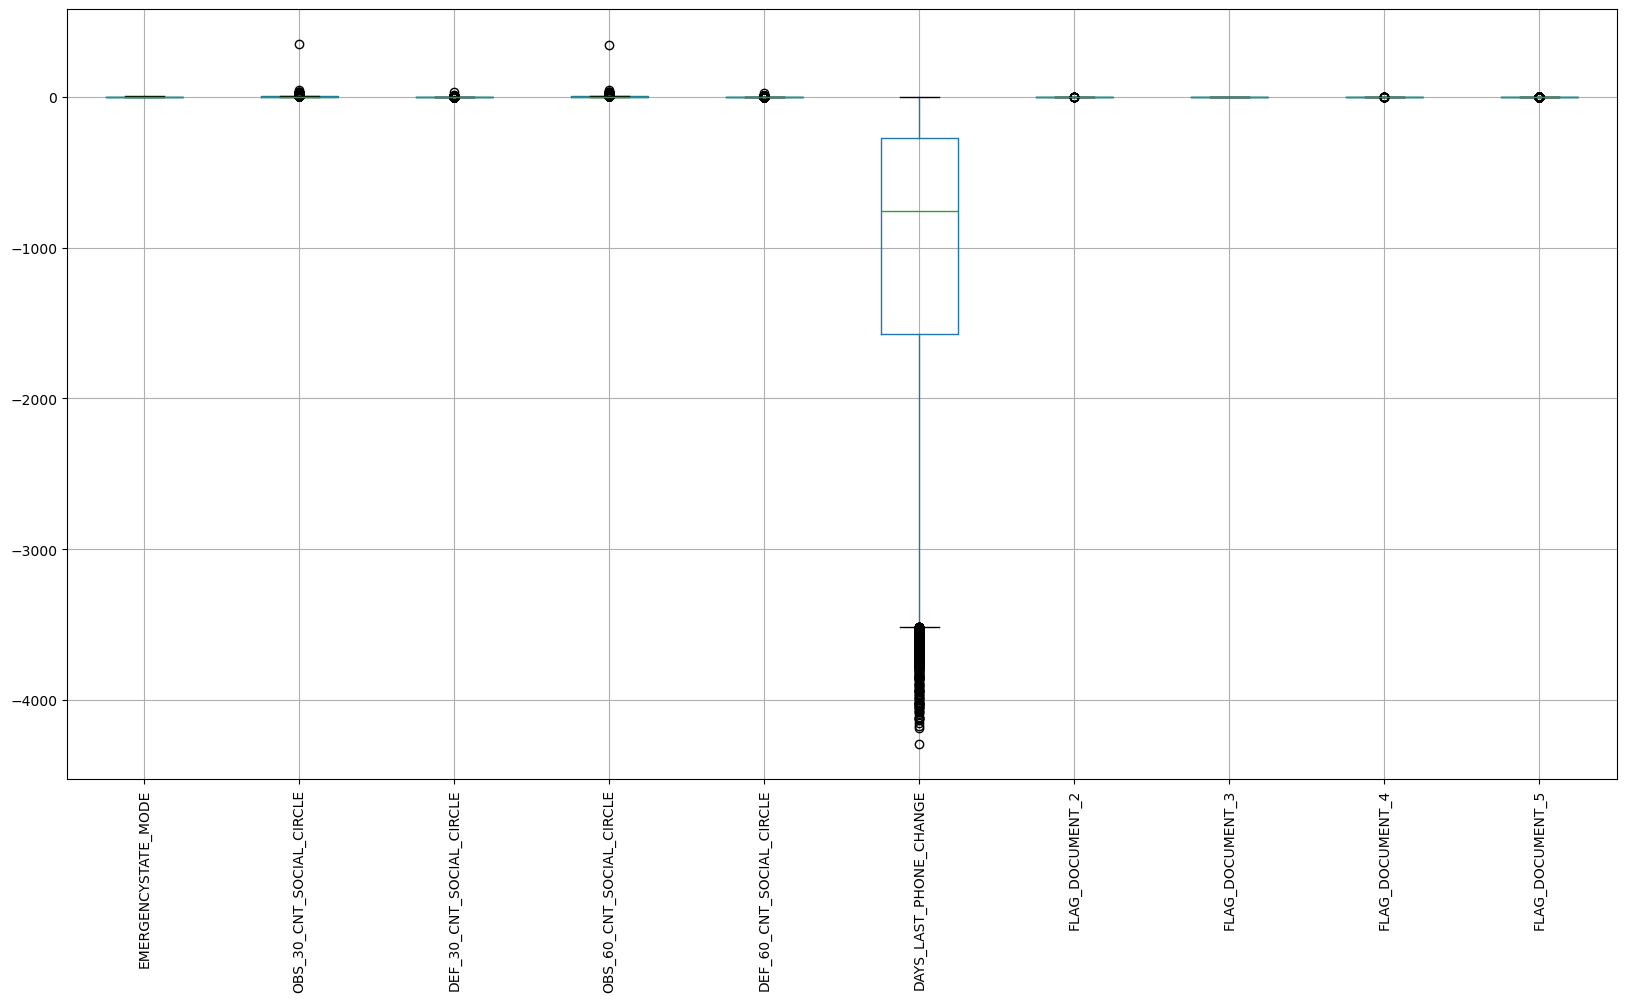

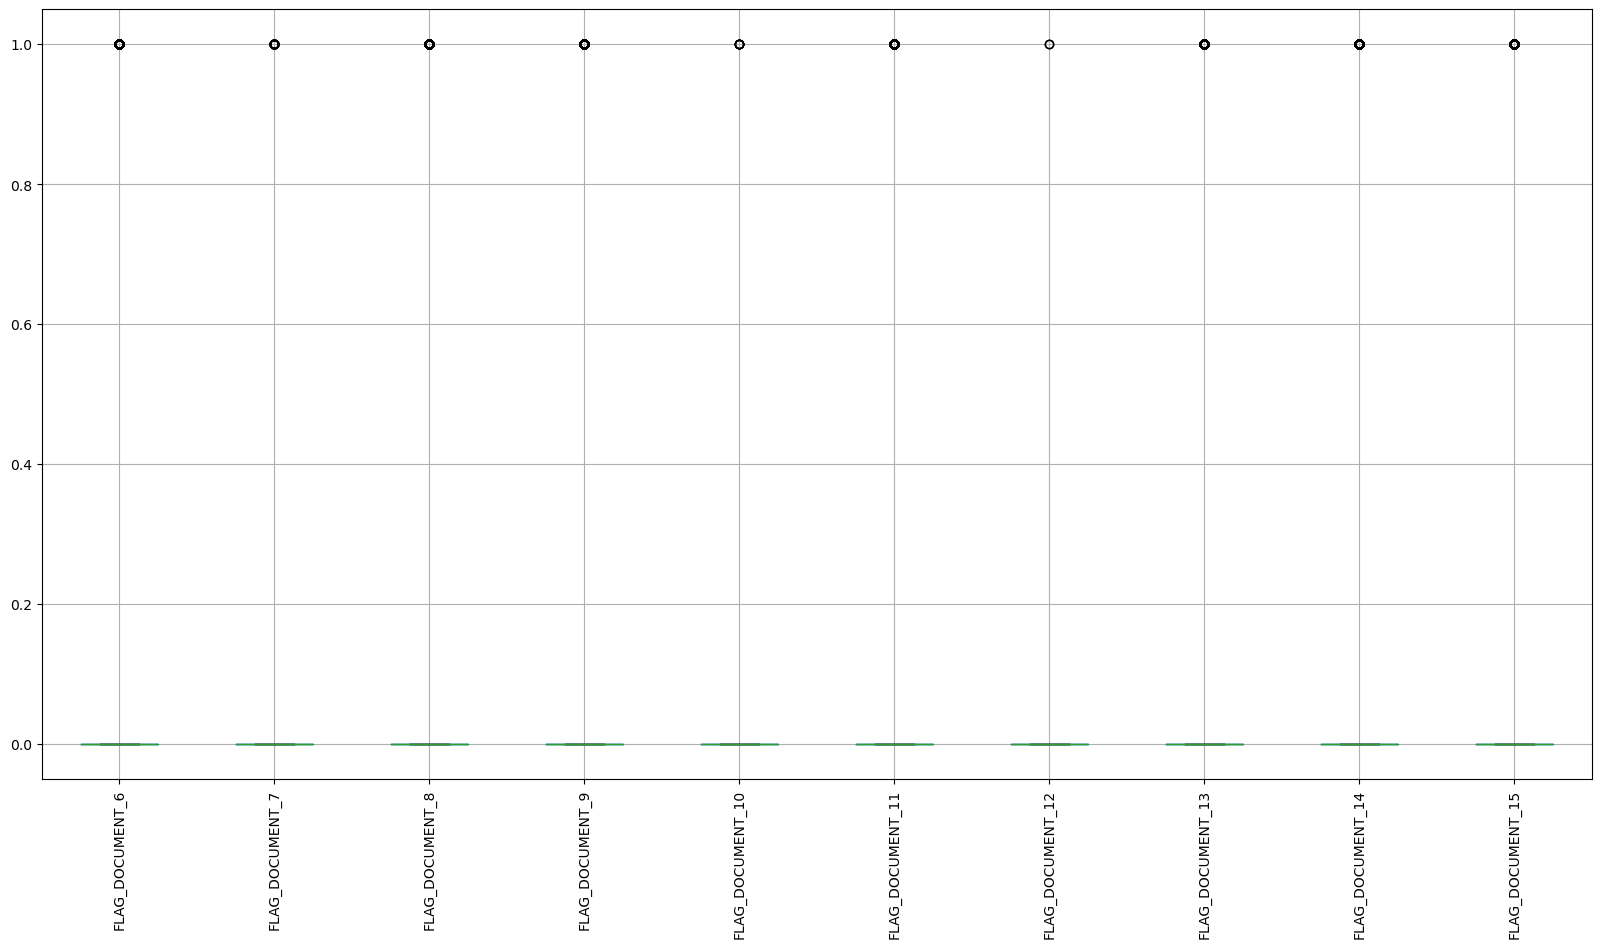

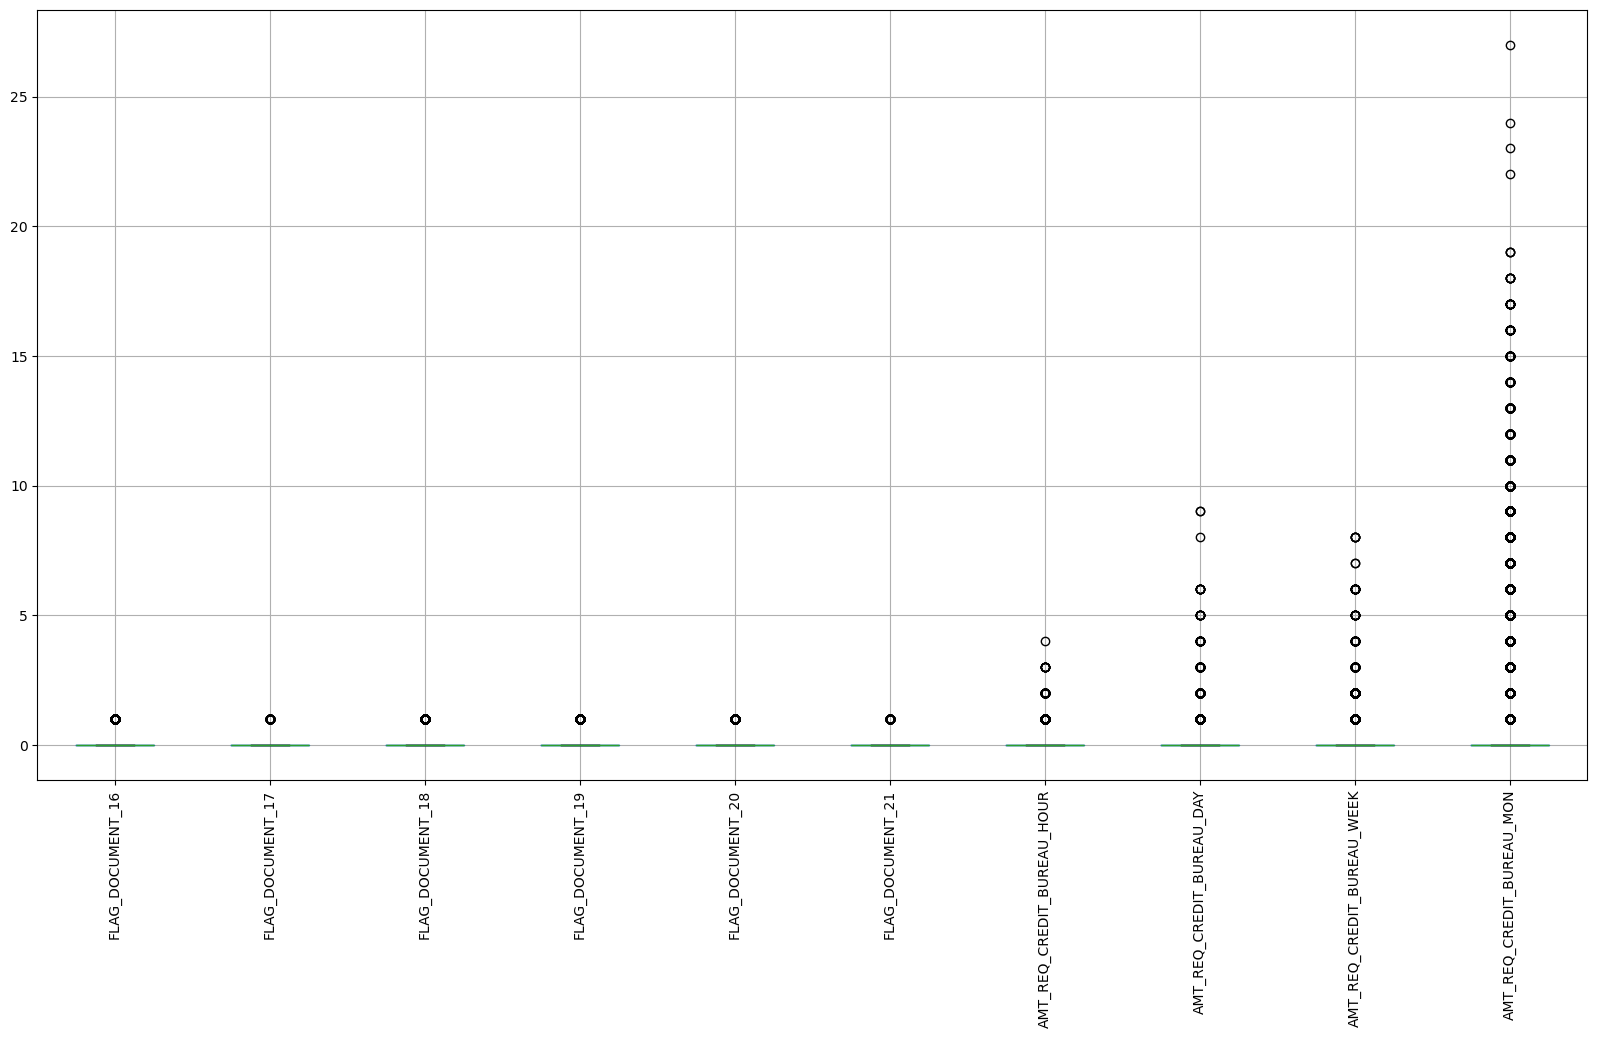

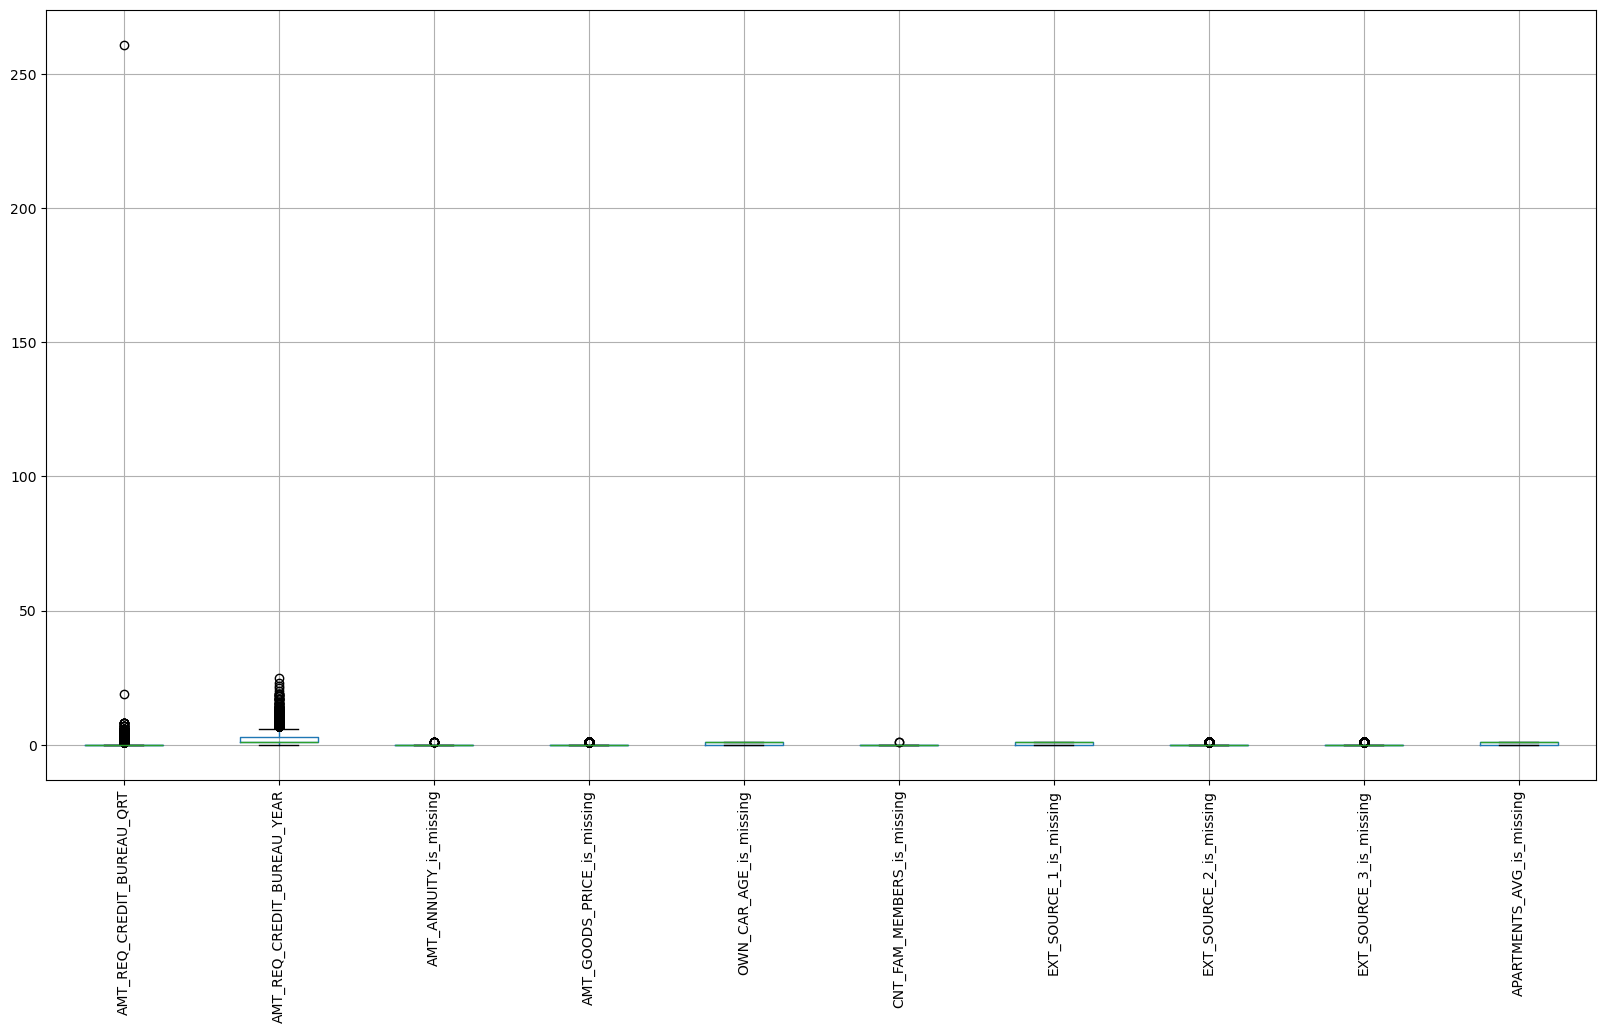

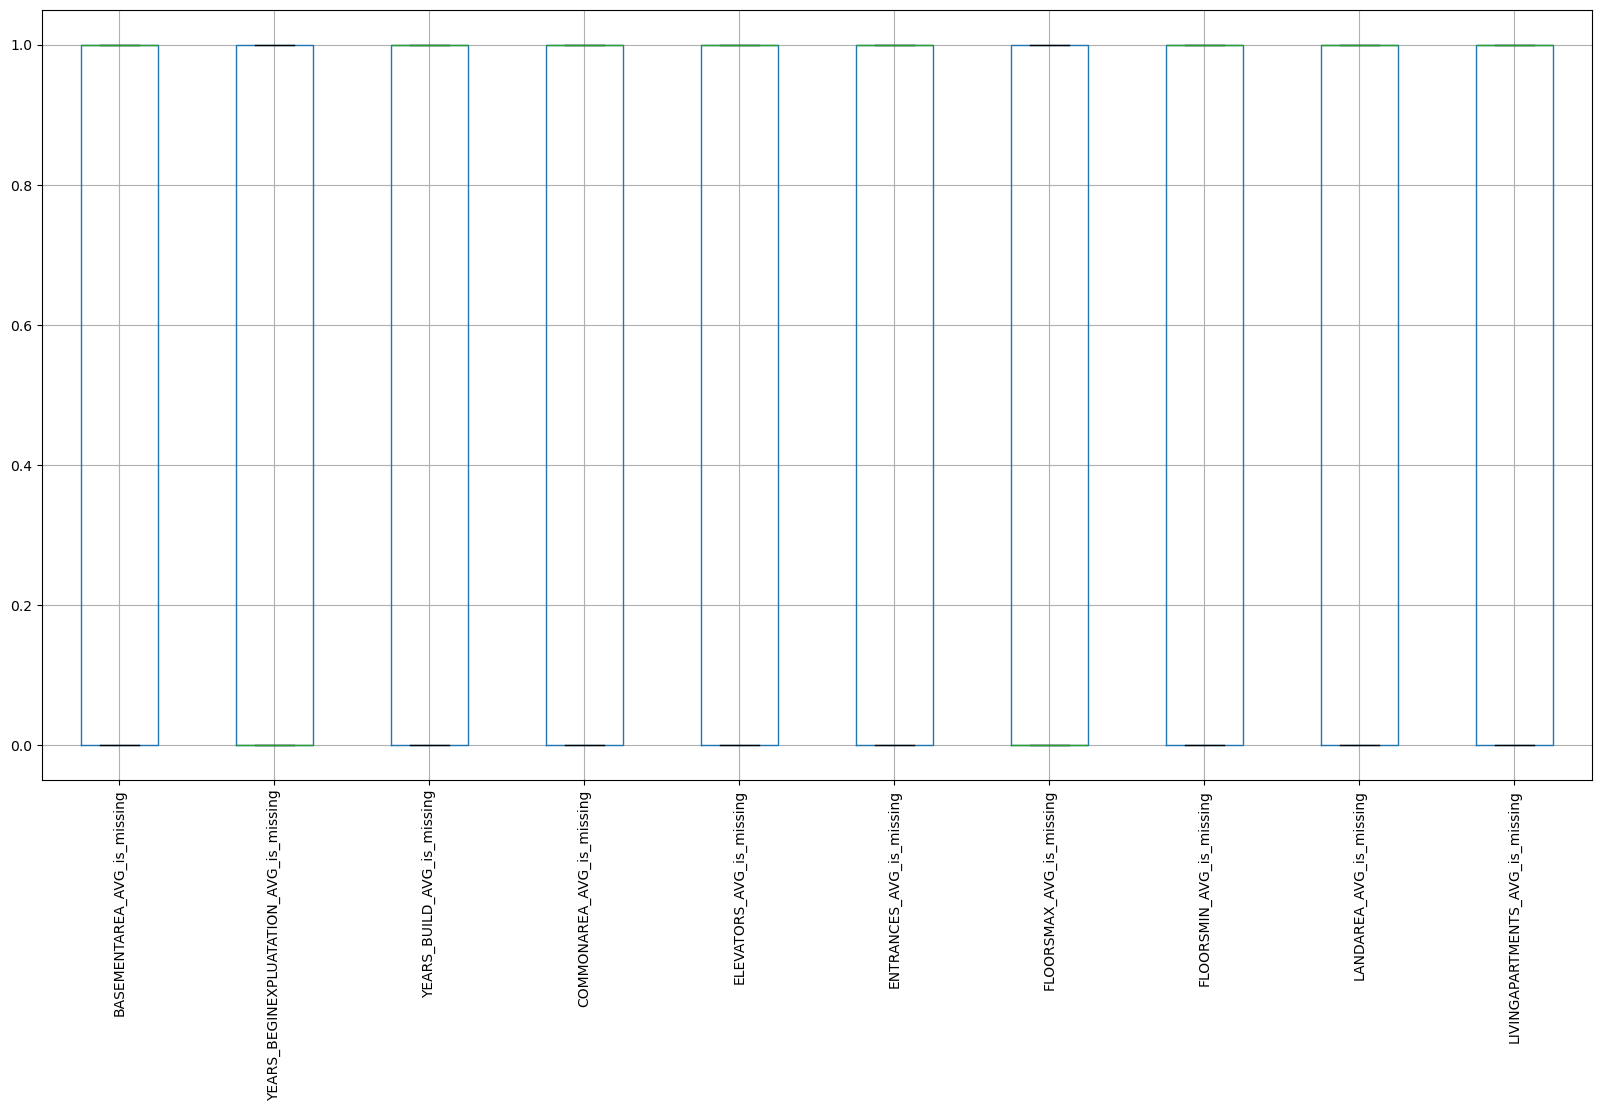

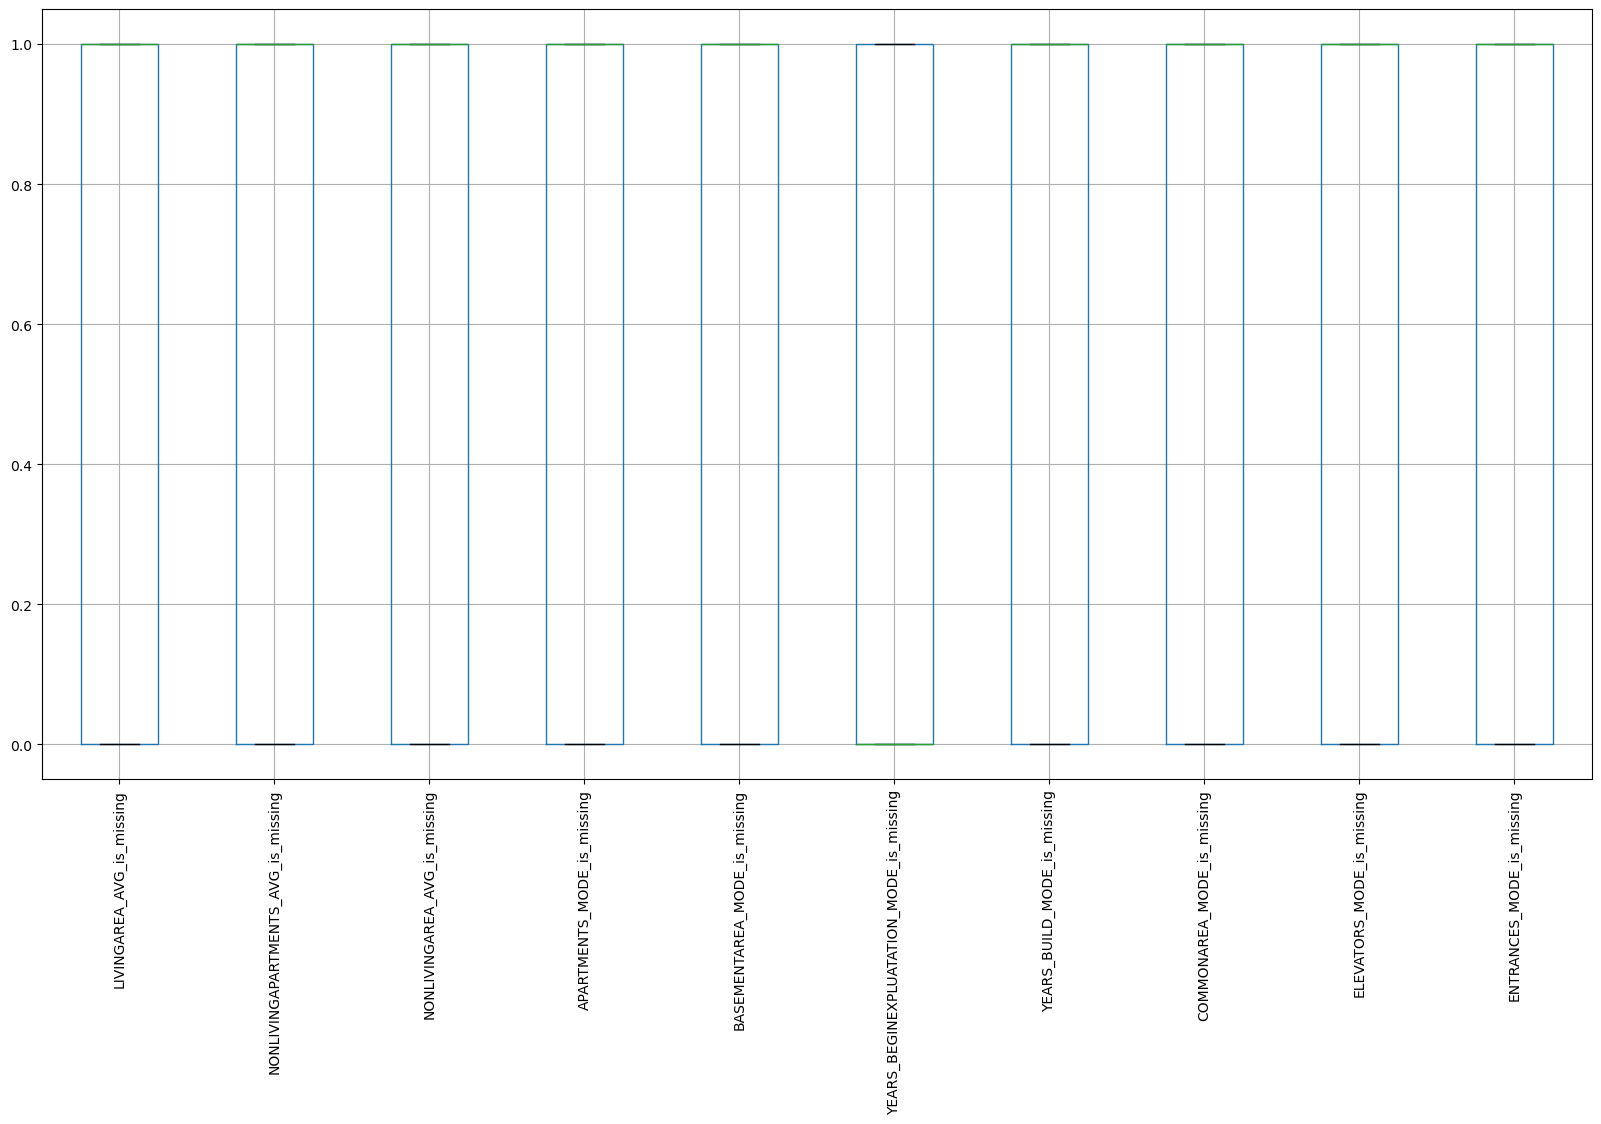

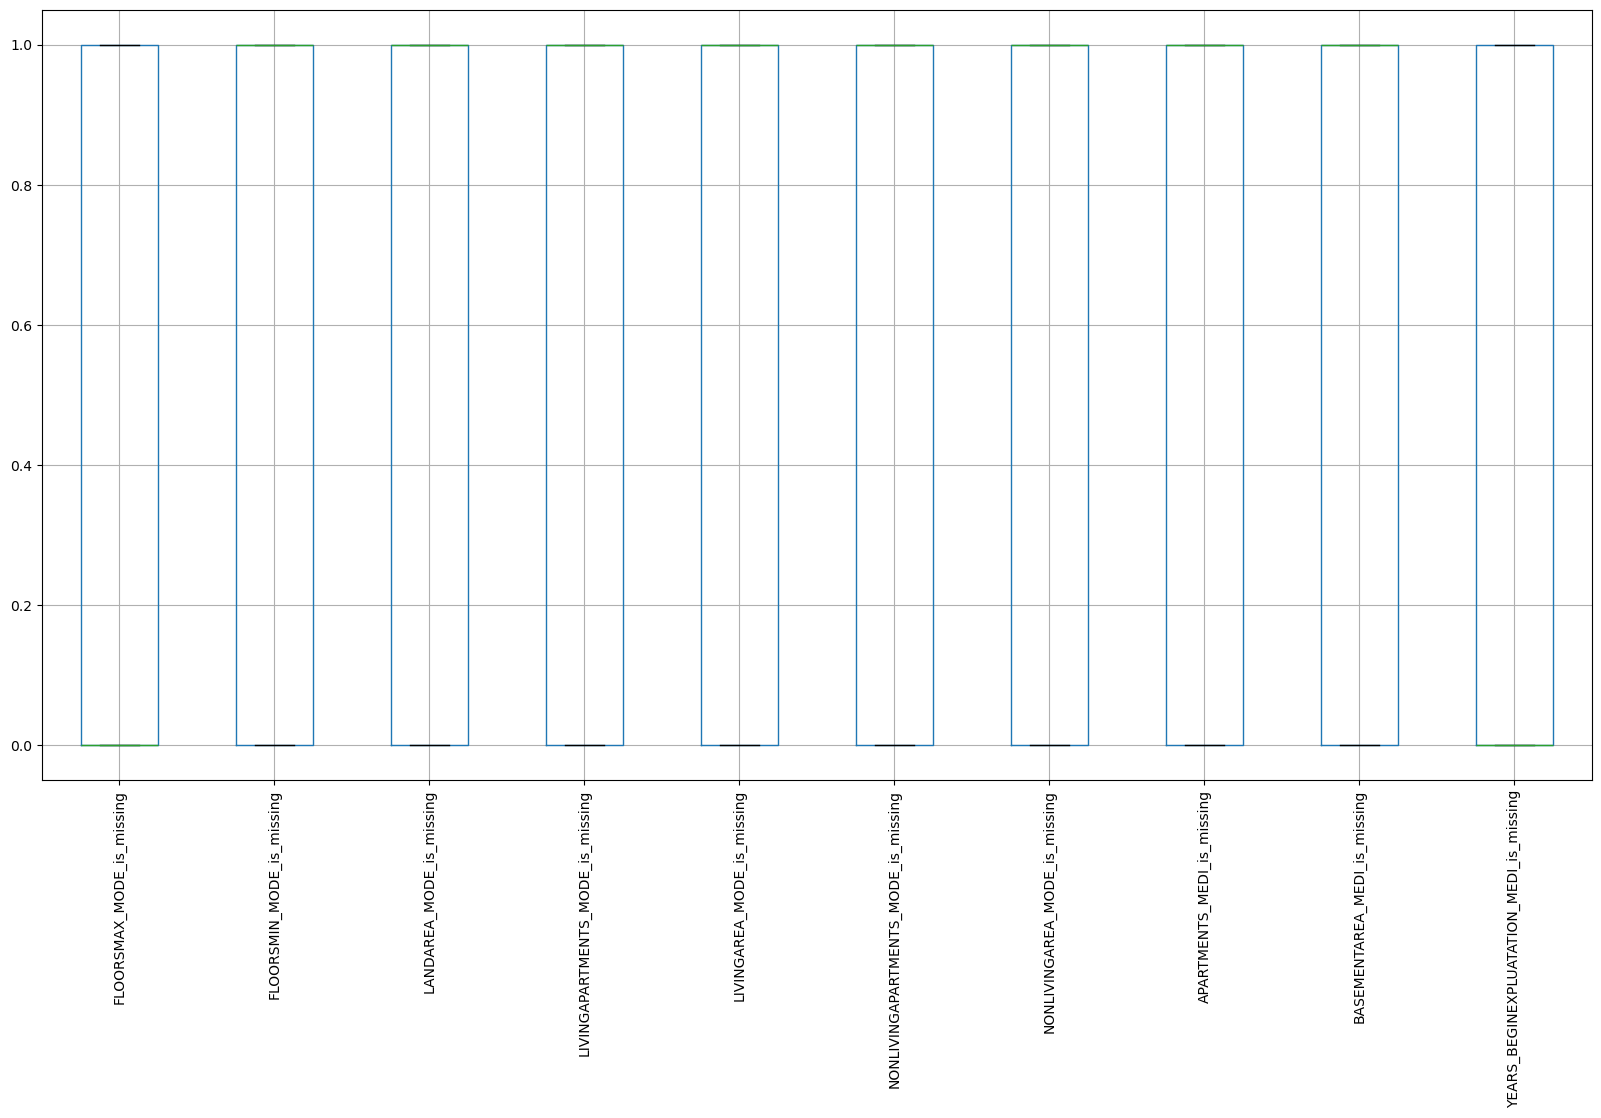

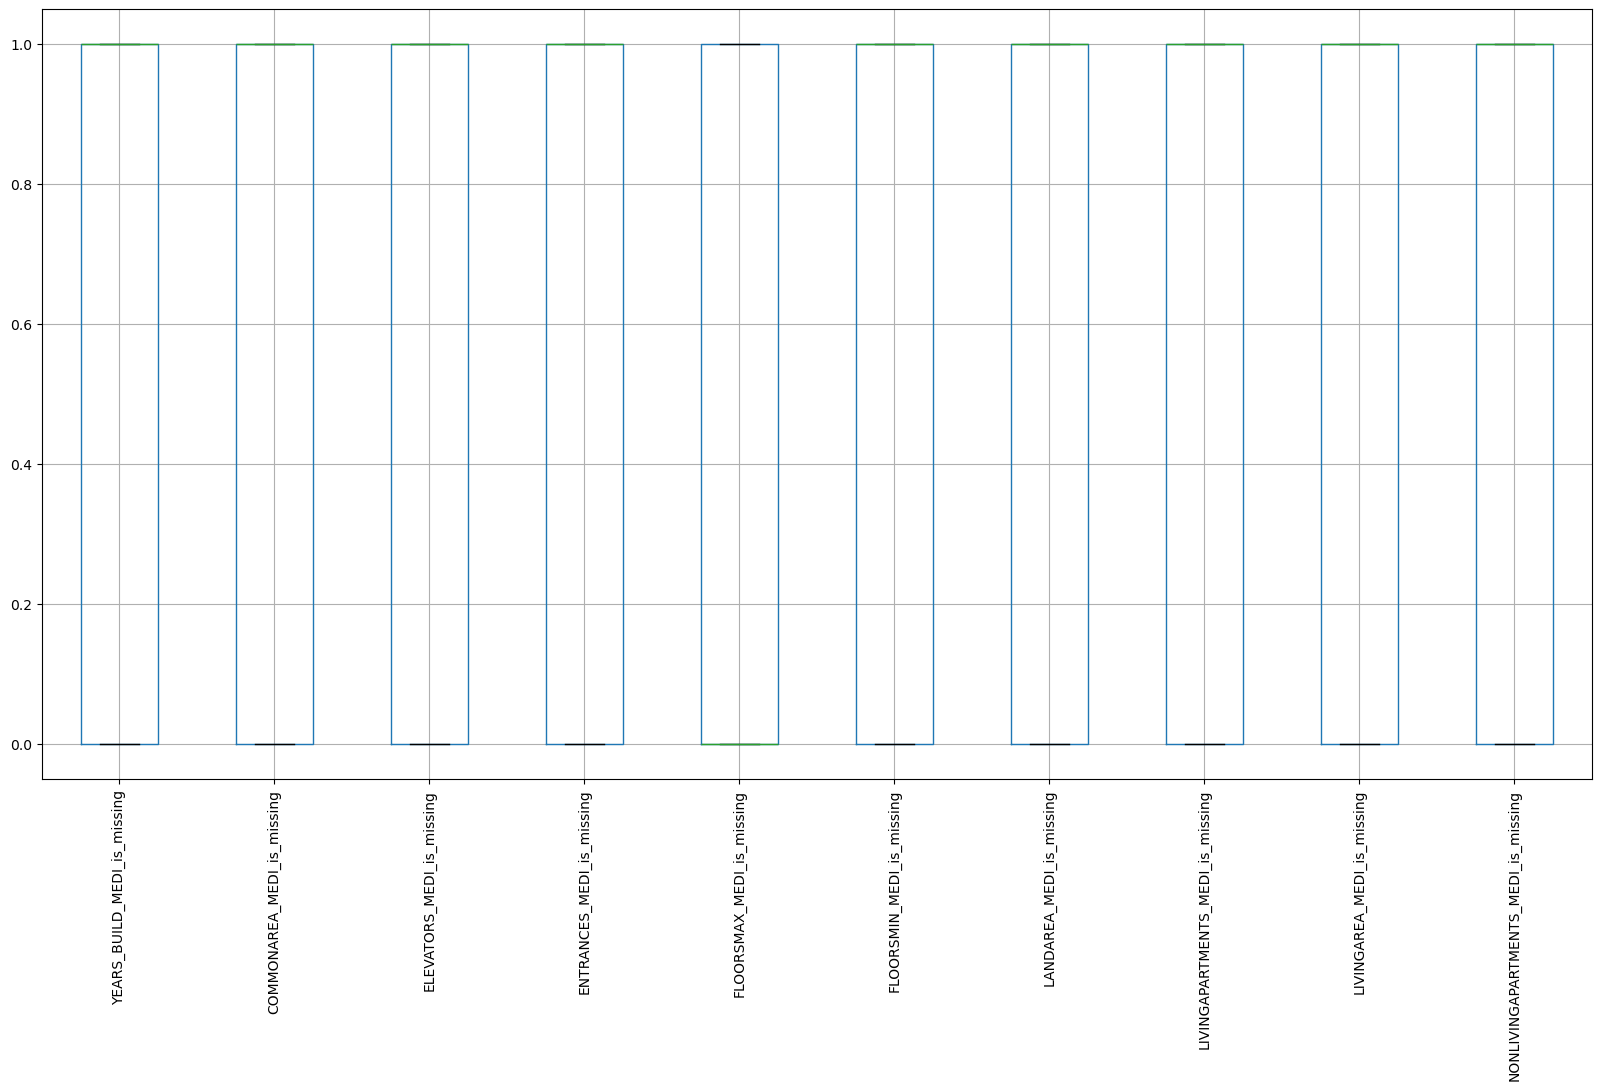

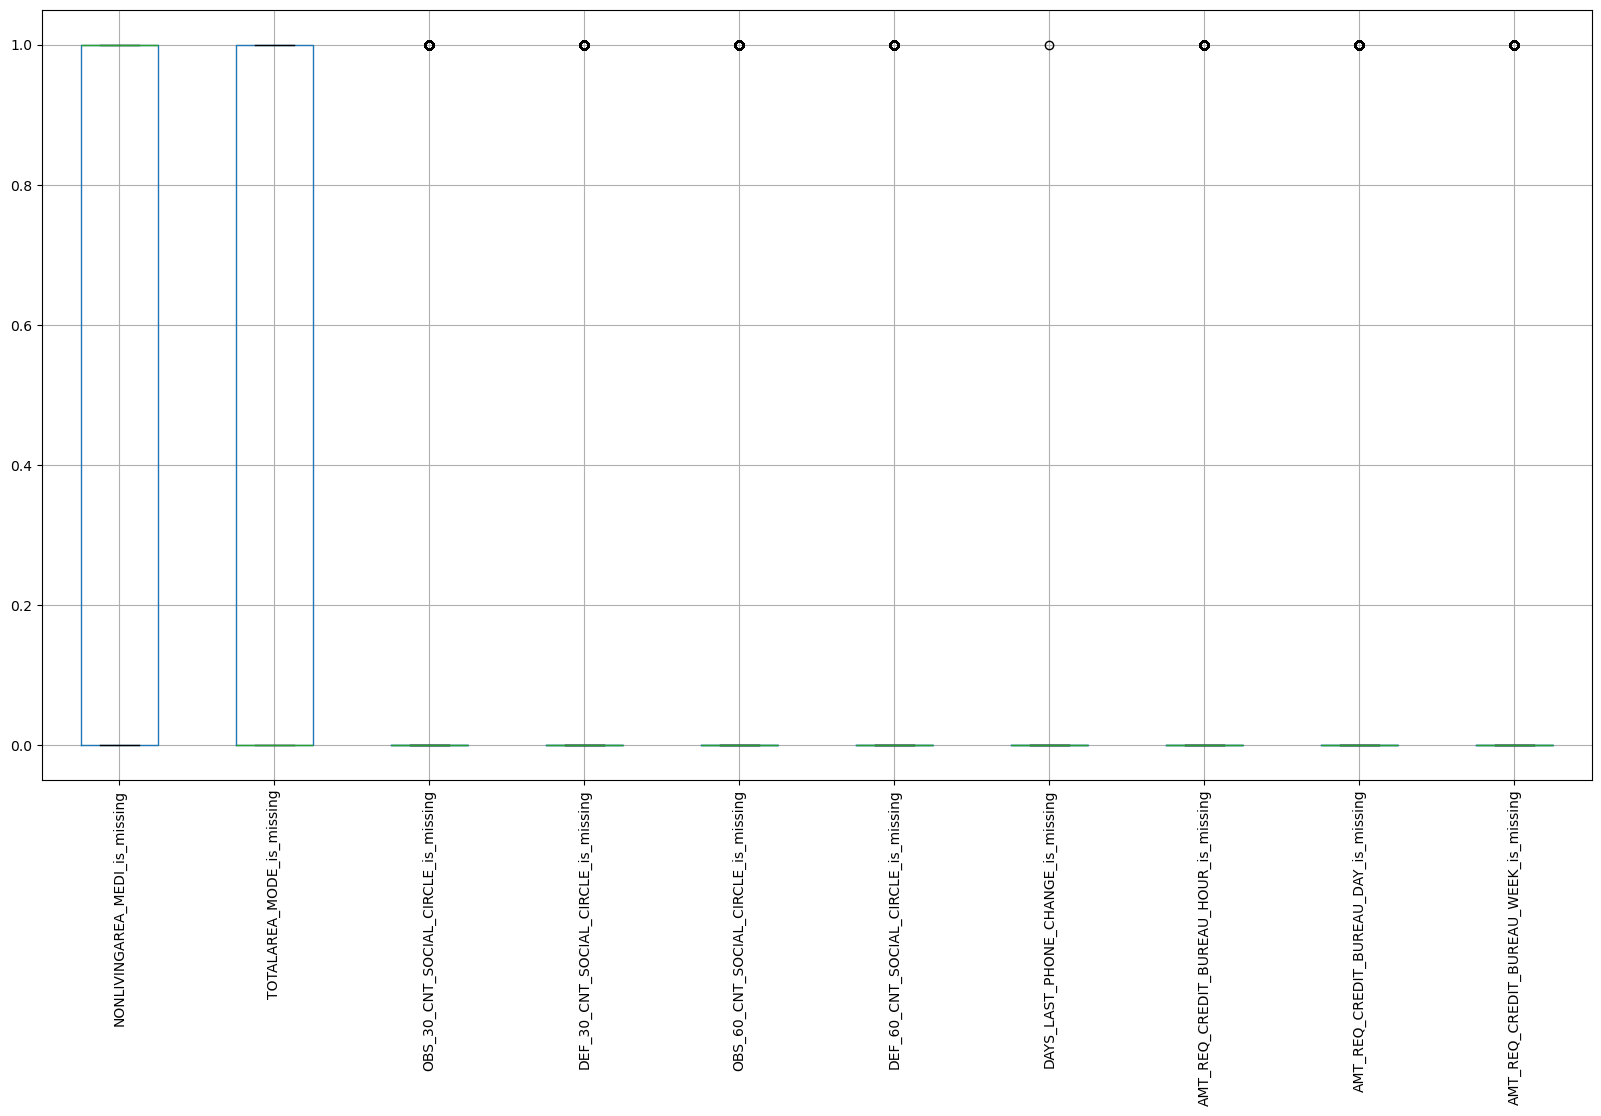

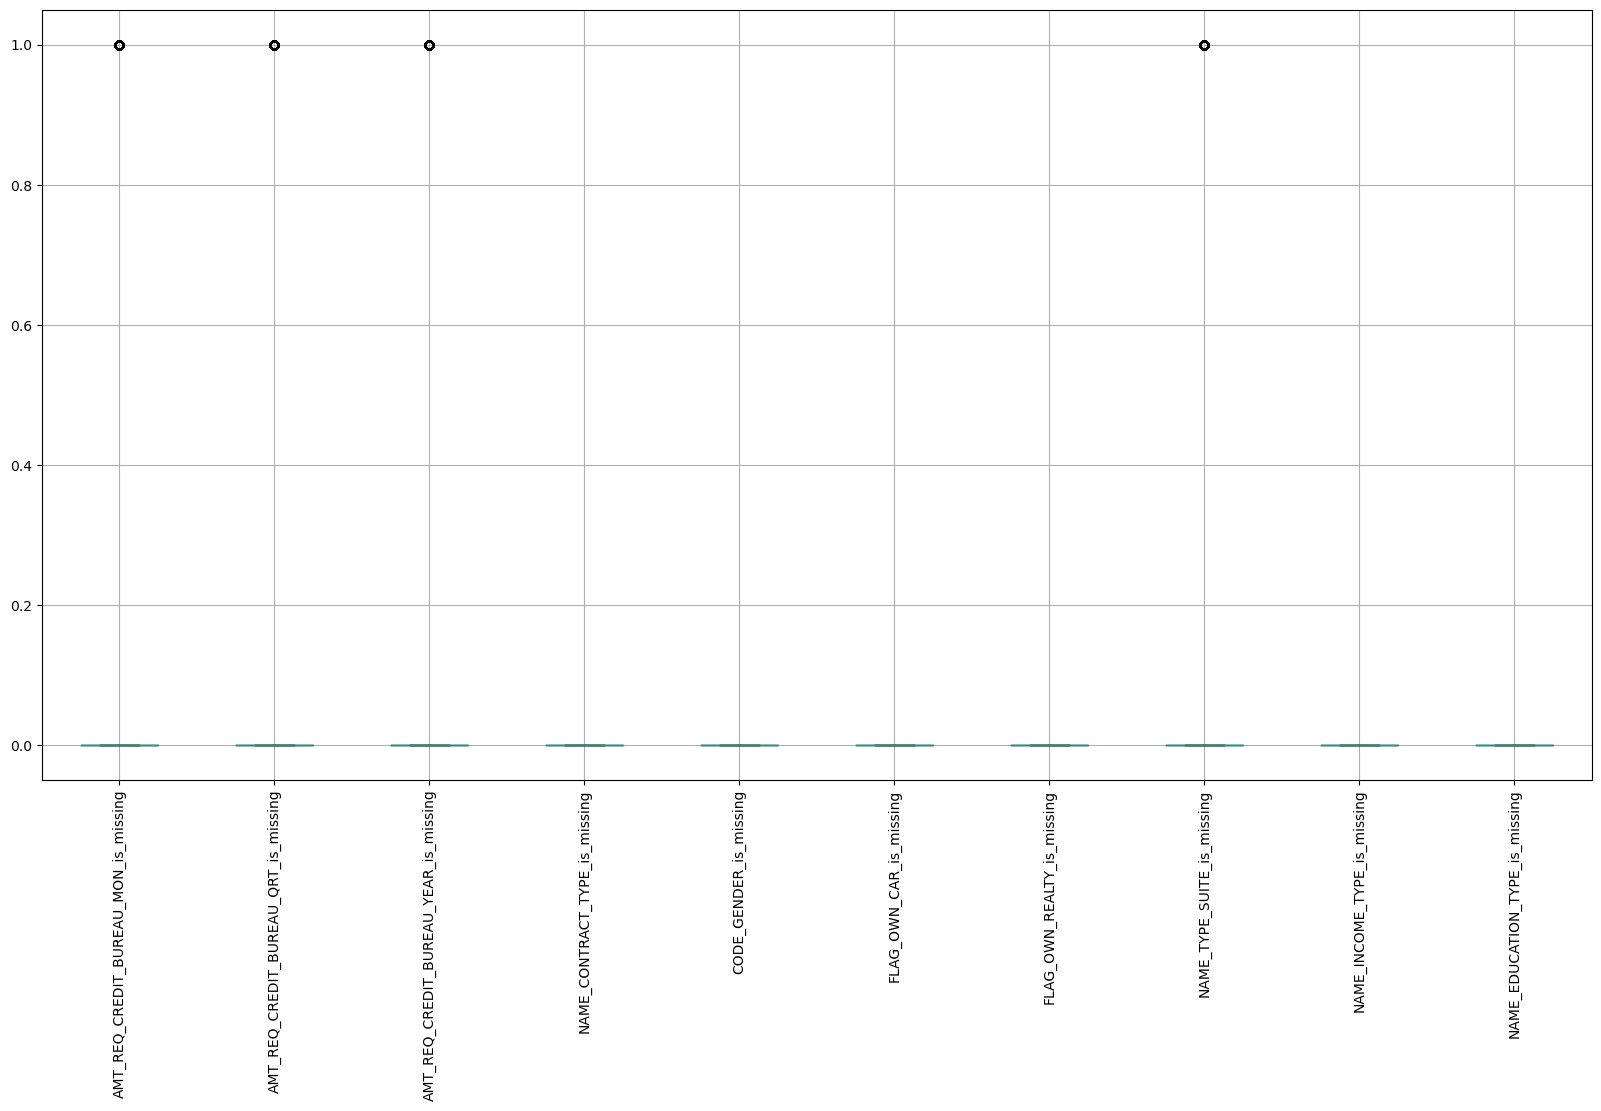

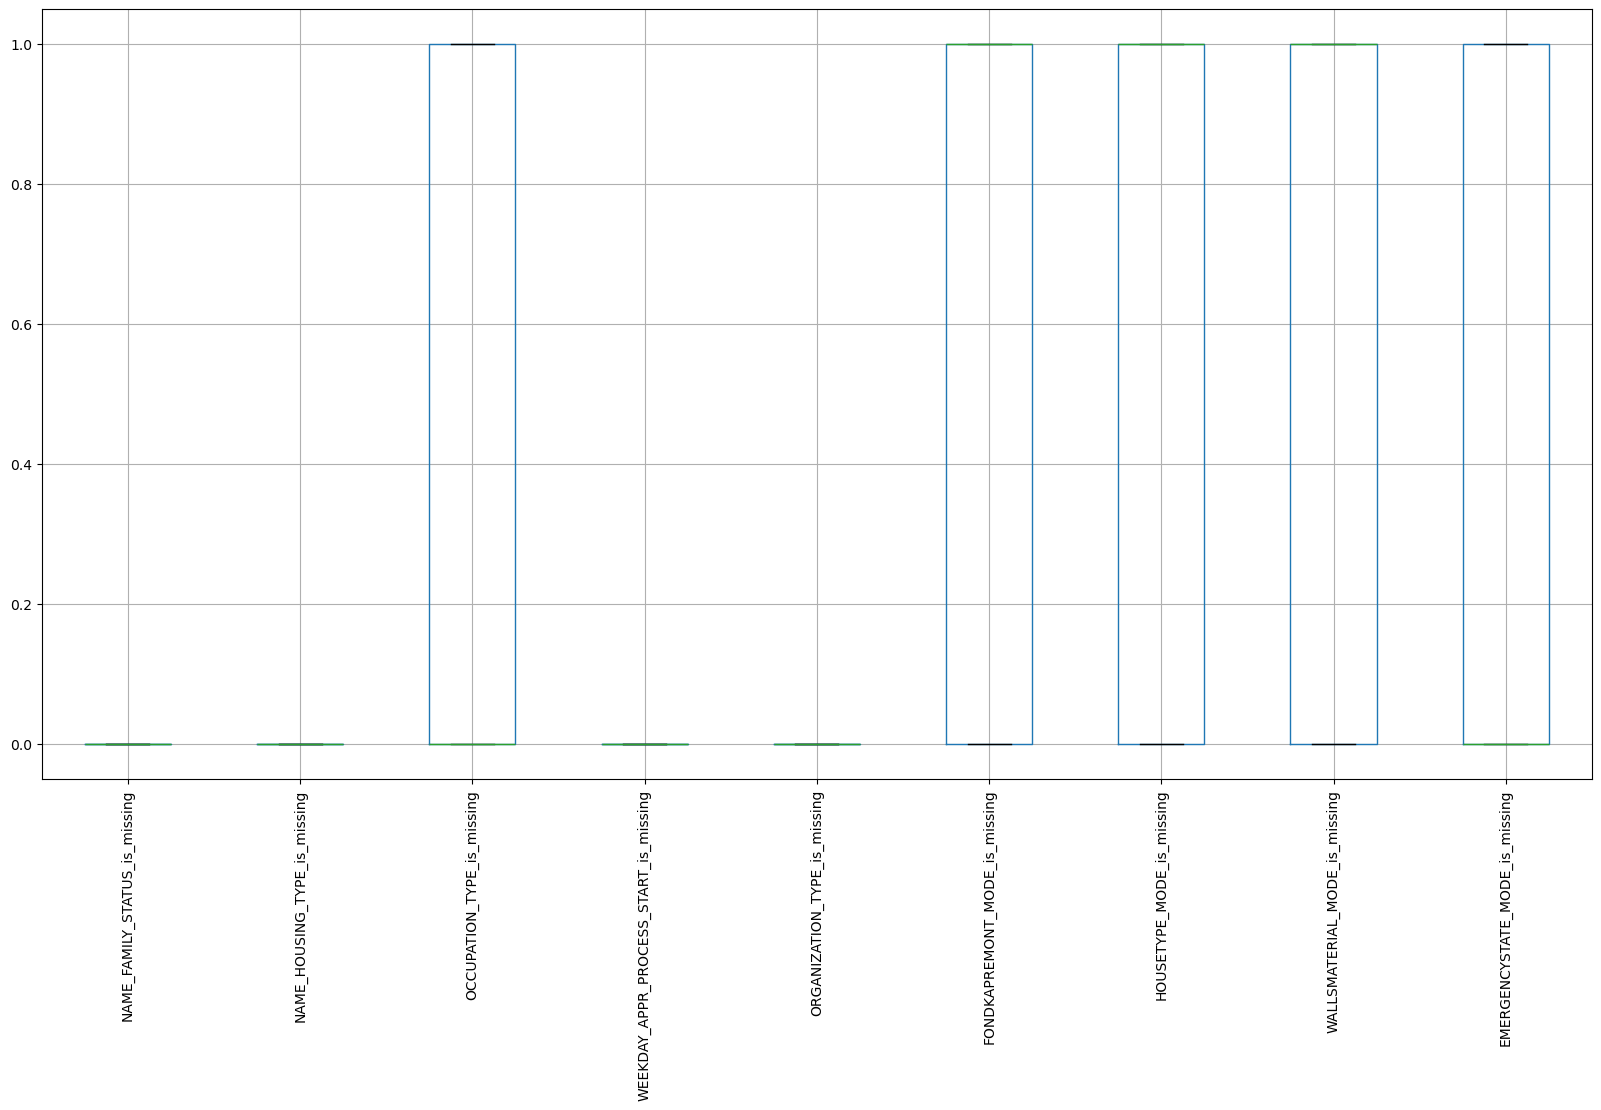

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the number of columns per plot
num_cols_per_plot = 10

# Get the total number of columns
columns = df_tmp.columns
total_cols = len(columns)

# Loop through the columns in chunks of 10
for i in range(0, total_cols, num_cols_per_plot):
    plt.figure(figsize=(20, 10))

    # Select the subset of columns for this iteration
    subset_columns = columns[i:i + num_cols_per_plot]

    # Create the boxplot for the selected columns
    df_tmp[subset_columns].boxplot()

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Save the plot as an image file (e.g., PNG)
    # filename = f"boxplot_{i+1}_{i+num_cols_per_plot}.png"
    # plt.savefig(filename, bbox_inches='tight', dpi=300)

    # Show the plot
    plt.show()



In [ ]:
df_tmp

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_EDUCATION_TYPE_is_missing,NAME_FAMILY_STATUS_is_missing,NAME_HOUSING_TYPE_is_missing,OCCUPATION_TYPE_is_missing,WEEKDAY_APPR_PROCESS_START_is_missing,ORGANIZATION_TYPE_is_missing,FONDKAPREMONT_MODE_is_missing,HOUSETYPE_MODE_is_missing,WALLSMATERIAL_MODE_is_missing,EMERGENCYSTATE_MODE_is_missing
0,100002,1,1,2,1,2,0,202500.0,406597.5,24700.5,...,False,False,False,False,False,False,False,False,False,False
1,100003,0,1,1,1,1,0,270000.0,1293502.5,35698.5,...,False,False,False,False,False,False,False,False,False,False
2,100004,0,2,2,2,2,0,67500.0,135000.0,6750.0,...,False,False,False,False,False,False,True,True,True,True
3,100006,0,1,1,1,2,0,135000.0,312682.5,29686.5,...,False,False,False,False,False,False,True,True,True,True
4,100007,0,1,2,1,2,0,121500.0,513000.0,21865.5,...,False,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,1,2,1,1,0,157500.0,254700.0,27558.0,...,False,False,False,False,False,False,False,False,False,False
307507,456252,0,1,1,1,2,0,72000.0,269550.0,12001.5,...,False,False,False,True,False,False,False,False,False,False
307508,456253,0,1,1,1,2,0,153000.0,677664.0,29979.0,...,False,False,False,False,False,False,False,False,False,False
307509,456254,1,1,1,1,2,0,171000.0,370107.0,20205.0,...,False,False,False,False,False,False,True,False,False,False


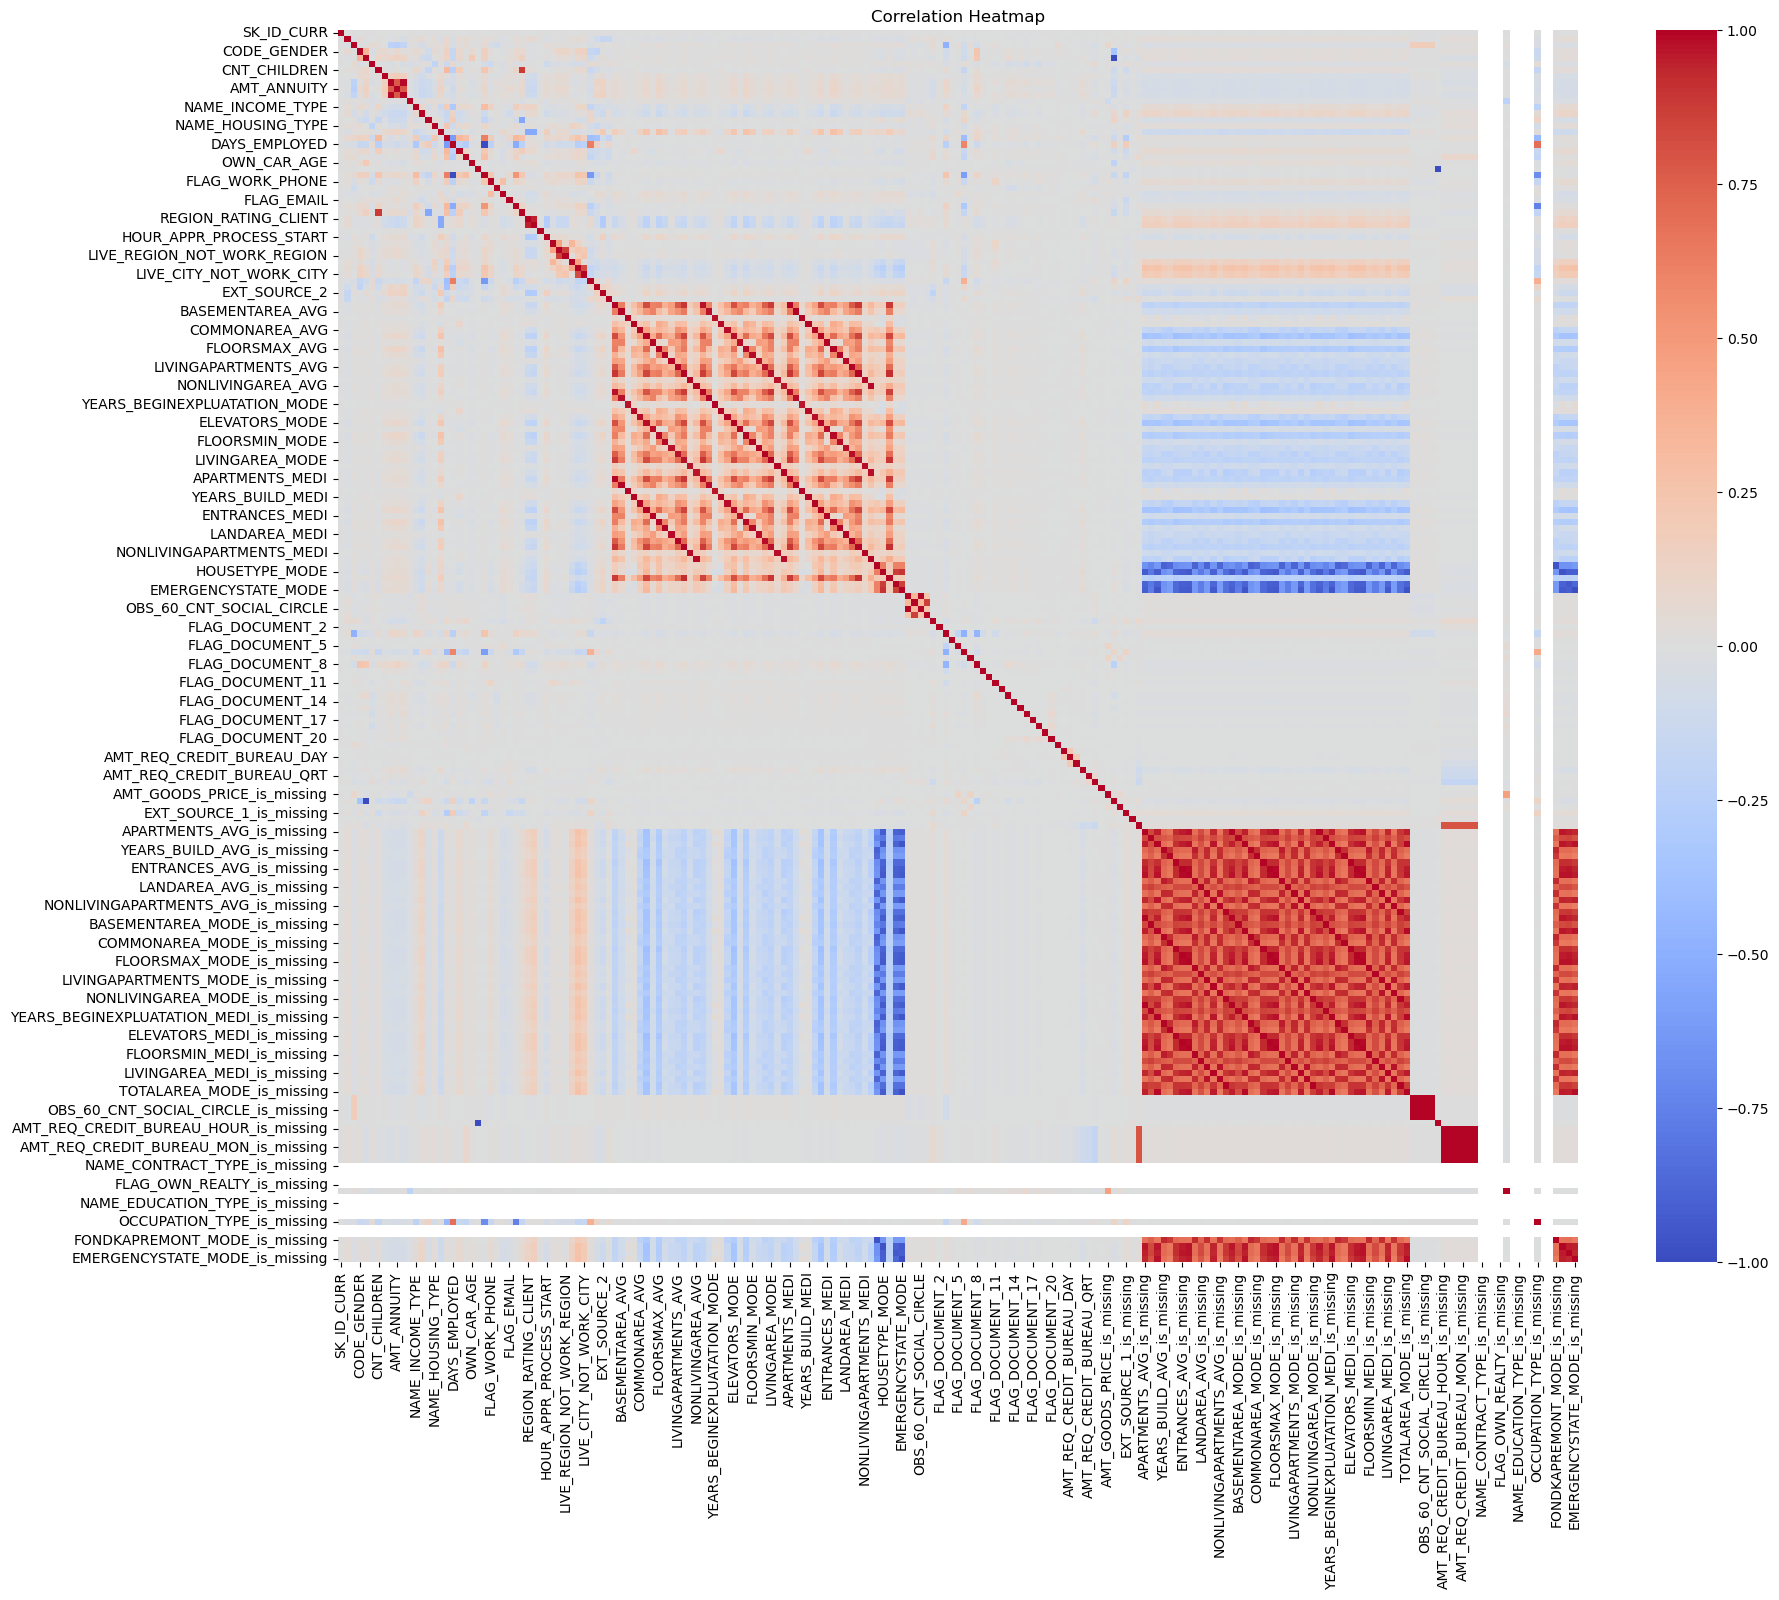

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(20, 16))
corr = df_tmp.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")  # Remove annotations for clarity
plt.title("Correlation Heatmap")
plt.savefig("HEATMAP", bbox_inches='tight', dpi=300)

plt.show()

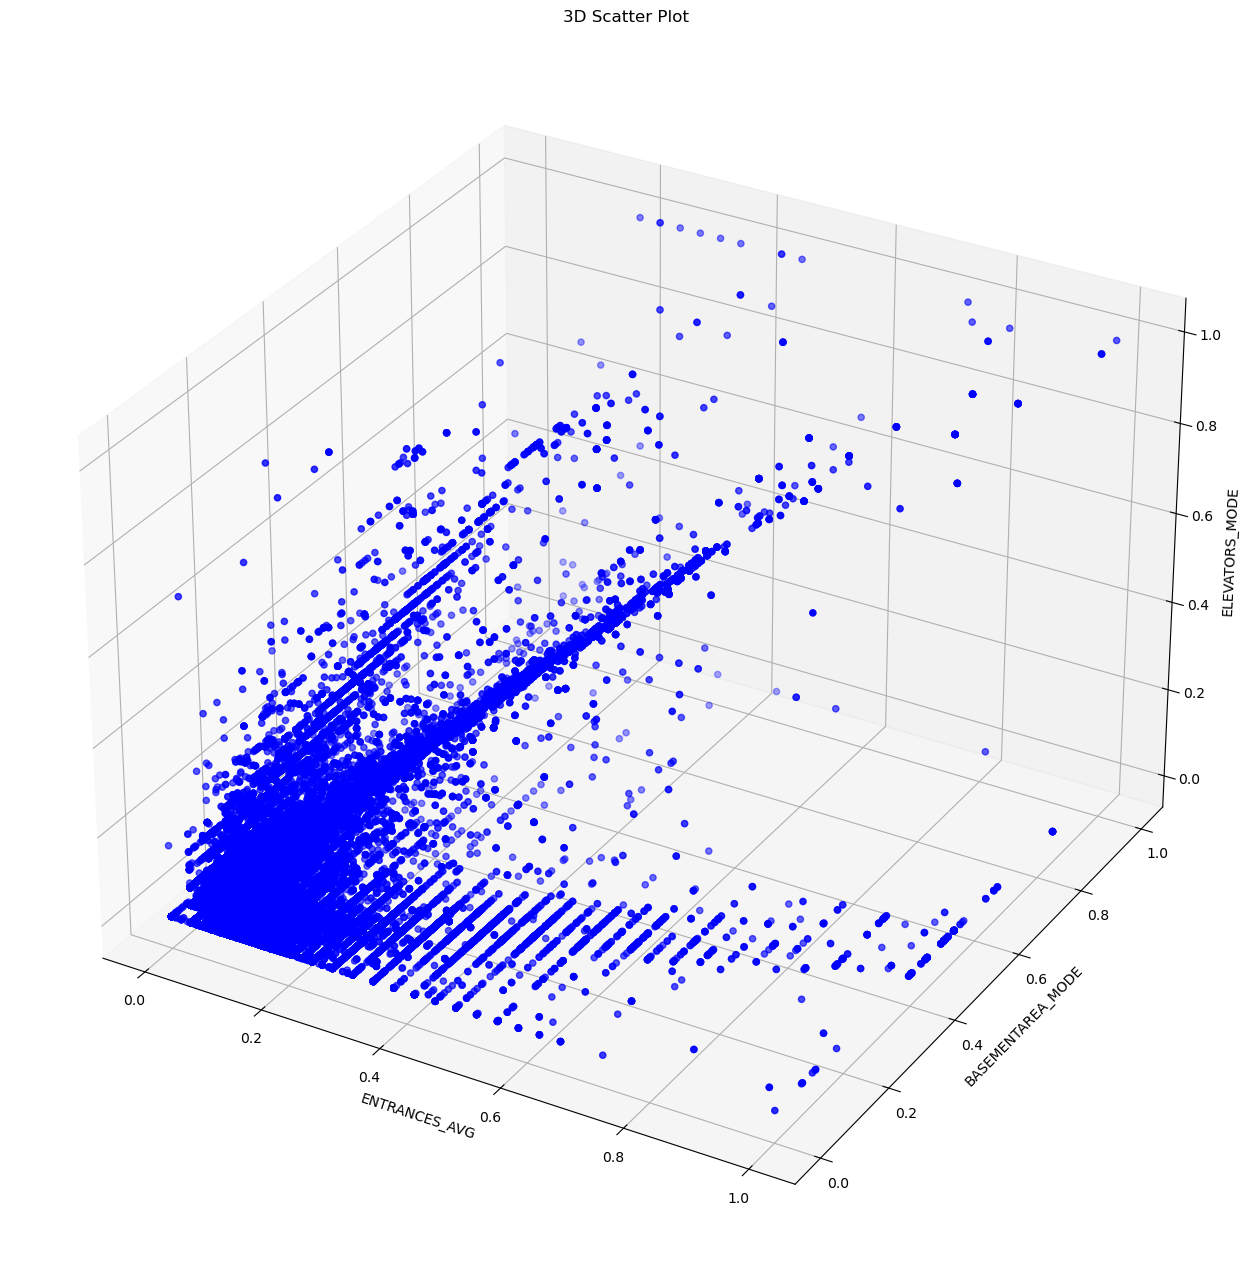

In [ ]:
import seaborn as sns


# 3D scatter plot

fig = plt.figure(figsize=(20, 16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['ENTRANCES_AVG'], df['BASEMENTAREA_MODE'], df['ELEVATORS_MODE'], c='blue', marker='o')
ax.set_xlabel('ENTRANCES_AVG')
ax.set_ylabel('BASEMENTAREA_MODE')
ax.set_zlabel('ELEVATORS_MODE')
plt.title("3D Scatter Plot")
plt.savefig("MULTIVARIATE", bbox_inches='tight', dpi=300)
plt.show()


In [ ]:
df_tmp.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'NAME_EDUCATION_TYPE_is_missing', 'NAME_FAMILY_STATUS_is_missing',
       'NAME_HOUSING_TYPE_is_missing', 'OCCUPATION_TYPE_is_missing',
       'WEEKDAY_APPR_PROCESS_START_is_missing', 'ORGANIZATION_TYPE_is_missing',
       'FONDKAPREMONT_MODE_is_missing', 'HOUSETYPE_MODE_is_missing',
       'WALLSMATERIAL_MODE_is_missing', 'EMERGENCYSTATE_MODE_is_missing'],
      dtype='object', length=199)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y=df_tmp["TARGET"]
X=df_tmp.drop("TARGET",axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train = pd.Series(y_train)
print("Class distribution after resampling:\n", y_train.value_counts())

Class distribution after resampling:
 TARGET
0    226178
1    226178
Name: count, dtype: int64


In [ ]:
df_tmp.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'NAME_EDUCATION_TYPE_is_missing', 'NAME_FAMILY_STATUS_is_missing',
       'NAME_HOUSING_TYPE_is_missing', 'OCCUPATION_TYPE_is_missing',
       'WEEKDAY_APPR_PROCESS_START_is_missing', 'ORGANIZATION_TYPE_is_missing',
       'FONDKAPREMONT_MODE_is_missing', 'HOUSETYPE_MODE_is_missing',
       'WALLSMATERIAL_MODE_is_missing', 'EMERGENCYSTATE_MODE_is_missing'],
      dtype='object', length=199)

In [ ]:
# complete x and y
import pandas as pd
import numpy as np

X = np.vstack((X_train, X_test))  # Stack X_train and X_test vertically
y = np.hstack((y_train, y_test))  # Stack y_train and y_test horizontally

In [ ]:

column_list=['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_ANNUITY_is_missing',
 'AMT_GOODS_PRICE_is_missing',
 'OWN_CAR_AGE_is_missing',
 'CNT_FAM_MEMBERS_is_missing',
 'EXT_SOURCE_1_is_missing',
 'EXT_SOURCE_2_is_missing',
 'EXT_SOURCE_3_is_missing',
 'APARTMENTS_AVG_is_missing',
 'BASEMENTAREA_AVG_is_missing',
 'YEARS_BEGINEXPLUATATION_AVG_is_missing',
 'YEARS_BUILD_AVG_is_missing',
 'COMMONAREA_AVG_is_missing',
 'ELEVATORS_AVG_is_missing',
 'ENTRANCES_AVG_is_missing',
 'FLOORSMAX_AVG_is_missing',
 'FLOORSMIN_AVG_is_missing',
 'LANDAREA_AVG_is_missing',
 'LIVINGAPARTMENTS_AVG_is_missing',
 'LIVINGAREA_AVG_is_missing',
 'NONLIVINGAPARTMENTS_AVG_is_missing',
 'NONLIVINGAREA_AVG_is_missing',
 'APARTMENTS_MODE_is_missing',
 'BASEMENTAREA_MODE_is_missing',
 'YEARS_BEGINEXPLUATATION_MODE_is_missing',
 'YEARS_BUILD_MODE_is_missing',
 'COMMONAREA_MODE_is_missing',
 'ELEVATORS_MODE_is_missing',
 'ENTRANCES_MODE_is_missing',
 'FLOORSMAX_MODE_is_missing',
 'FLOORSMIN_MODE_is_missing',
 'LANDAREA_MODE_is_missing',
 'LIVINGAPARTMENTS_MODE_is_missing',
 'LIVINGAREA_MODE_is_missing',
 'NONLIVINGAPARTMENTS_MODE_is_missing',
 'NONLIVINGAREA_MODE_is_missing',
 'APARTMENTS_MEDI_is_missing',
 'BASEMENTAREA_MEDI_is_missing',
 'YEARS_BEGINEXPLUATATION_MEDI_is_missing',
 'YEARS_BUILD_MEDI_is_missing',
 'COMMONAREA_MEDI_is_missing',
 'ELEVATORS_MEDI_is_missing',
 'ENTRANCES_MEDI_is_missing',
 'FLOORSMAX_MEDI_is_missing',
 'FLOORSMIN_MEDI_is_missing',
 'LANDAREA_MEDI_is_missing',
 'LIVINGAPARTMENTS_MEDI_is_missing',
 'LIVINGAREA_MEDI_is_missing',
 'NONLIVINGAPARTMENTS_MEDI_is_missing',
 'NONLIVINGAREA_MEDI_is_missing',
 'TOTALAREA_MODE_is_missing',
 'OBS_30_CNT_SOCIAL_CIRCLE_is_missing',
 'DEF_30_CNT_SOCIAL_CIRCLE_is_missing',
 'OBS_60_CNT_SOCIAL_CIRCLE_is_missing',
 'DEF_60_CNT_SOCIAL_CIRCLE_is_missing',
 'DAYS_LAST_PHONE_CHANGE_is_missing',
 'AMT_REQ_CREDIT_BUREAU_HOUR_is_missing',
 'AMT_REQ_CREDIT_BUREAU_DAY_is_missing',
 'AMT_REQ_CREDIT_BUREAU_WEEK_is_missing',
 'AMT_REQ_CREDIT_BUREAU_MON_is_missing',
 'AMT_REQ_CREDIT_BUREAU_QRT_is_missing',
 'AMT_REQ_CREDIT_BUREAU_YEAR_is_missing',
 'NAME_CONTRACT_TYPE_is_missing',
 'CODE_GENDER_is_missing',
 'FLAG_OWN_CAR_is_missing',
 'FLAG_OWN_REALTY_is_missing',
 'NAME_TYPE_SUITE_is_missing',
 'NAME_INCOME_TYPE_is_missing',
 'NAME_EDUCATION_TYPE_is_missing',
 'NAME_FAMILY_STATUS_is_missing',
 'NAME_HOUSING_TYPE_is_missing',
 'OCCUPATION_TYPE_is_missing',
 'WEEKDAY_APPR_PROCESS_START_is_missing',
 'ORGANIZATION_TYPE_is_missing',
 'FONDKAPREMONT_MODE_is_missing',
 'HOUSETYPE_MODE_is_missing',
 'WALLSMATERIAL_MODE_is_missing',
 'EMERGENCYSTATE_MODE_is_missing']


In [ ]:
import numpy as np
import pandas as pd

# Example Data

target_name = ['TARGET']  # Name for dependent variable
column_names = column_list + target_name  # Combine names

# Combine X and y into a DataFrame
df_tmp = pd.DataFrame(np.column_stack((X, y)), columns=column_names)

# Display the DataFrame
print(df_tmp)

        SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0        -1.304340           -0.324172     1.390599     -0.717099   
1        -1.436795           -0.324172    -0.719010     -0.717099   
2        -0.356111           -0.324172    -0.719010      1.394508   
3         1.456549           -0.324172    -0.719010      1.394508   
4        -0.990837           -0.324172     1.390599     -0.717099   
...            ...                 ...          ...           ...   
513854    0.353826            3.084779    -0.719010     -0.717099   
513855    0.313852           -0.324172    -0.719010      1.394508   
513856    0.062498           -0.324172     1.390599     -0.717099   
513857    0.997257           -0.324172    -0.719010     -0.717099   
513858    0.750065           -0.324172    -0.719010     -0.717099   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0              0.663648      0.809427          0.301785   -0.368995   
1              0.663648     -

In [ ]:

np.random.seed=42
from  sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

clf1=RandomForestClassifier()

clf1.fit(X_train,y_train)



RandomForestClassifier()

In [ ]:

clf1.score(X_test,y_test)


0.9170609563761117

In [ ]:
import pandas as pd

# Convert NumPy arrays to DataFrames
df_train = pd.DataFrame(X_train)
df_test = pd.DataFrame(X_test)

df_train,df_test

(             0         1         2         3         4         5         6    \
 0       1.724785 -0.324509 -0.720650 -0.718165  0.664112 -0.578913  0.043674   
 1       0.310732 -0.324509 -0.720650 -0.718165  0.664112 -0.578913 -0.043359   
 2      -0.420174  3.081577 -0.720650  1.392438  0.664112  0.805661 -0.217426   
 3       1.209438  3.081577  1.387535  1.392438 -1.505770 -0.578913  0.181727   
 4      -1.574476 -0.324509 -0.720650  1.392438  0.664112 -0.578913  0.217741   
 ...          ...       ...       ...       ...       ...       ...       ...   
 452385 -0.842983 -0.324509  1.289315 -0.718165  0.664112 -0.514406 -0.136069   
 452386 -0.893271 -0.324509 -0.720650 -0.718165  0.664112  0.185492 -0.236646   
 452387 -1.437681 -0.324509  1.356201  1.392438  0.664112  0.805661  0.037982   
 452388 -1.314915 -0.324509  0.540211 -0.718165 -0.633648 -0.578913  0.079491   
 452389  0.564508 -0.324509 -0.720650 -0.718165 -0.704759  2.552581 -0.120467   
 
              7         8 

In [ ]:
X_scaled = pd.concat([df_train, df_test], ignore_index=True)

print(X_scaled)

             0         1         2         3         4         5         6    \
0       1.724785 -0.324509 -0.720650 -0.718165  0.664112 -0.578913  0.043674   
1       0.310732 -0.324509 -0.720650 -0.718165  0.664112 -0.578913 -0.043359   
2      -0.420174  3.081577 -0.720650  1.392438  0.664112  0.805661 -0.217426   
3       1.209438  3.081577  1.387535  1.392438 -1.505770 -0.578913  0.181727   
4      -1.574476 -0.324509 -0.720650  1.392438  0.664112 -0.578913  0.217741   
...          ...       ...       ...       ...       ...       ...       ...   
513888 -0.387961 -0.324509 -0.720650 -0.718165  0.664112 -0.578913  0.565875   
513889 -0.747737 -0.324509 -0.720650 -0.718165  0.664112 -0.578913 -0.200019   
513890 -1.098621 -0.324509  1.387535  1.392438  0.664112  0.805661 -0.043359   
513891 -0.955134 -0.324509  1.387535  1.392438 -1.505770 -0.578913  0.217741   
513892 -1.192313 -0.324509  1.387535  1.392438 -1.505770 -0.578913 -0.130393   

             7         8         9    .

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf1,X_scaled,y)

array([0.91927223, 0.91927092, 0.91927092, 0.91925466, 0.9192384 ])

In [ ]:
#id3
np.random.seed=42

from sklearn.tree import DecisionTreeClassifier

clf2 = DecisionTreeClassifier(criterion = "entropy")

clf2.fit(X_train,y_train)




DecisionTreeClassifier(criterion='entropy')

In [ ]:

print(clf2.score(X_test,y_test))

0.8397639139554168


In [ ]:

from sklearn.naive_bayes import GaussianNB
clf3 =GaussianNB()

clf3.fit(X_train,y_train)


GaussianNB()

In [ ]:
print(clf3.score(X_test,y_test))

0.13357072012747345


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
classifier.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean')

In [ ]:
print(classifier.score(X_test,y_test))


0.579679040046827


In [ ]:
!pip install seaborn

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56496
           1       0.29      0.00      0.00      5007

    accuracy                           0.92     61503
   macro avg       0.60      0.50      0.48     61503
weighted avg       0.87      0.92      0.88     61503



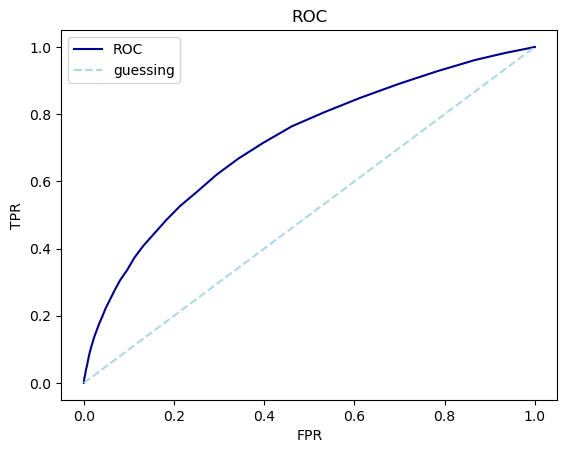

AREA UNDER ROC CURVE = 0.7174931518983024


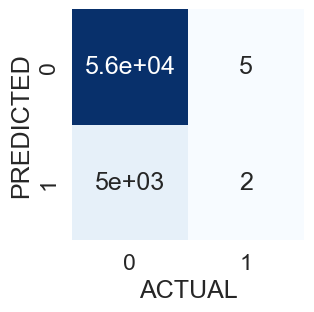

In [ ]:
np.random.seed=42
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

def evaluate_model(x_test,y_test,model):
    y_preds=model.predict(x_test)
    print(classification_report(y_test,y_preds))
    y_probs = model.predict_proba(x_test)
    y_probs_positive=y_probs[:,1]
    fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)
    #plot roc curve
    plt.plot(fpr,tpr,color="darkblue", label ="ROC")

    #plot line with no predictive power(baseline)
    plt.plot([0,1],[0,1],color="lightblue",linestyle="--",label="guessing")
    #Customise the plot
    plt.xlabel ("FPR")
    plt.ylabel("TPR")
    plt.title("ROC")
    plt.legend()
    plt.show()

    print("AREA UNDER ROC CURVE =",roc_auc_score(y_test,y_probs_positive))
    sns.set(font_scale=1.5)

    #create confussion matrix
    conf_mat = confusion_matrix(y_test,y_preds)

    fig,ax=plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,annot=True,cbar=False,cmap="Blues")
    plt.xlabel("ACTUAL")
    plt.ylabel("PREDICTED")

evaluate_model(X_test,y_test,clf1)


Selected Features using Correlation-Based Selection: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'radius error', 'perimeter error', 'area error', 'compactness error', 'concavity error', 'concave points error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
Selected Features using Relief-F: ['worst radius', 'worst concave points', 'worst perimeter', 'worst texture', 'mean radius']
Selected Features using Information Gain: ['mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concave points']
Explained Variance Ratio of Selected Principal Components: [9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05]


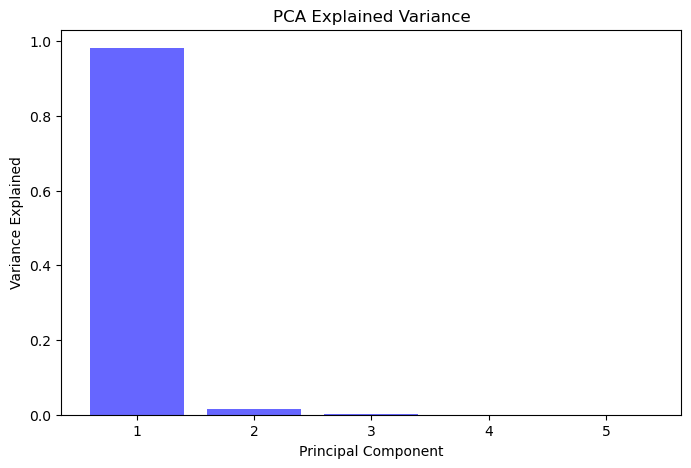

In [ ]:

import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA
from skrebate import ReliefF
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


def correlation_feature_selection(X, y, threshold=0.2):
    corr_values = []
    for col in X.columns:
        corr, _ = spearmanr(X[col], y)
        corr_values.append(abs(corr))

    feature_scores = pd.Series(corr_values, index=X.columns)
    selected_features = feature_scores[feature_scores > threshold].index
    return X[selected_features]

X_corr_selected = correlation_feature_selection(X, y)
print("Selected Features using Correlation-Based Selection:", list(X_corr_selected.columns))


def relief_feature_selection(X, y, num_features=5):
    relief = ReliefF(n_neighbors=7, n_features_to_select=num_features)
    X_relief = relief.fit_transform(X.values, y)
    selected_indices = relief.top_features_[:num_features]
    return X.iloc[:, selected_indices]

X_relief_selected = relief_feature_selection(X, y, num_features=5)
print("Selected Features using Relief-F:", list(X_relief_selected.columns))



def information_gain_feature_selection(X, y, num_features=5):
    selector = SelectKBest(score_func=mutual_info_classif, k=num_features)
    X_info_gain = selector.fit_transform(X, y)
    selected_indices = selector.get_support(indices=True)
    return X.iloc[:, selected_indices]

X_info_selected = information_gain_feature_selection(X, y, num_features=5)
print("Selected Features using Information Gain:", list(X_info_selected.columns))


def pca_feature_selection(X, num_components=5):
    pca = PCA(n_components=num_components)
    X_pca = pca.fit_transform(X)
    return X_pca, pca.explained_variance_ratio_

X_pca_selected, variance_ratio = pca_feature_selection(X, num_components=5)
print("Explained Variance Ratio of Selected Principal Components:", variance_ratio)

# Plot PCA Variance Explained
plt.figure(figsize=(8, 5))
plt.bar(range(1, 6), variance_ratio, alpha=0.6, color='b')
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("PCA Explained Variance")
plt.show()